<a href="https://colab.research.google.com/github/sairamkiran9/AttnGAN-trans/blob/structure/T2I_Colab_Console.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install pytorch_pretrained_bert
!pip install flask-ngrok
!pip install transformers
#!pip install SentencePiece

     |████████████████████████████████| 123 kB 5.5 MB/s 
     |████████████████████████████████| 131 kB 43.5 MB/s 
     |████████████████████████████████| 8.5 MB 45.8 MB/s 
     |████████████████████████████████| 79 kB 8.1 MB/s 
     |████████████████████████████████| 138 kB 49.4 MB/s 
     |████████████████████████████████| 127 kB 35.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 3.4 MB 5.4 MB/s 
     |████████████████████████████████| 895 kB 39.5 MB/s 
     |████████████████████████████████| 67 kB 4.7 MB/s 
     |████████████████████████████████| 596 kB 45.6 MB/s 


In [ ]:
!pip uninstall pyyaml -y

Found existing installation: PyYAML 6.0
Uninstalling PyYAML-6.0:
  Successfully uninstalled PyYAML-6.0


In [ ]:
!pip install pyyaml==5.4.1

     |████████████████████████████████| 636 kB 5.3 MB/s 


In [ ]:
cd '/content/'

/content


In [ ]:
# rm -r '/content/data/DAMSMencoders'
!mkdir ./models

In [ ]:
#!rm -r /content/html_files  /content/static

In [ ]:
!cp -r /content/drive/MyDrive/data/html_files /content/html_files
!cp -r /content/drive/MyDrive/data/static /content/static
#!mkdir /content/static/results

In [ ]:
!mkdir /content/models/xlnet/
!mkdir /content/models/bert/
!mkdir /content/models/gpt2/
!mkdir /content/models/attngan/

In [ ]:
import cv2
from tqdm.notebook import tqdm,trange
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import textwrap,csv
from flask import Flask, request, render_template  
#from eval import eval_main
import os
import time
from flask_ngrok import run_with_ngrok
from transformers import XLNetTokenizer, XLNetModel

In [ ]:
!rm -r '/content/data/birds'

rm: cannot remove '/content/data/birds': No such file or directory


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/data/birds.zip", 'r')
zip_ref.extractall("/content/data")
zip_ref.close()

In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/data/cfg.zip", 'r')
zip_ref.extractall("/content/data/")
zip_ref.close()

In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/data/XLNet.zip", 'r')
zip_ref.extractall("/content/data/DAMSMencoders/xlnet")
zip_ref.close()

In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/data/bird.zip", 'r')
zip_ref.extractall("/content/data/DAMSMencoders/attngan")
zip_ref.close()

In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/data/gpt2.zip", 'r')
zip_ref.extractall("/content/data/DAMSMencoders/gpt2")
zip_ref.close()

In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/data/bert.zip", 'r')
zip_ref.extractall("/content/data/DAMSMencoders/bert")
zip_ref.close()

In [ ]:
import tarfile
fname = "/content/drive/My Drive/data/CUB_200_2011.tar.gz"
if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall("/content/data/birds")
    tar.close()
elif fname.endswith("tar"):
    tar = tarfile.open(fname, "r:")
    tar.extractall("/content/data/birds")
    tar.close()

In [ ]:
#!rm -r /content/models

In [ ]:
!cp /content/data/DAMSMencoders/xlnet/XLNet_text_encoder200.pth /content/models/xlnet/
!cp /content/drive/MyDrive/data/Model/netG_epoch_630.pth /content/models/xlnet/
!cp /content/data/DAMSMencoders/bert/bert_text_encoder200.pth /content/models/bert/
!cp /content/drive/MyDrive/data/Model/netG_epoch_658.pth /content/models/bert/
!cp /content/data/DAMSMencoders/gpt2/gpt2_text_encoder200.pth /content/models/gpt2/
!cp /content/drive/MyDrive/data/Model/netG_epoch_695.pth /content/models/gpt2/
!cp /content/data/DAMSMencoders/attngan/bird/text_encoder200.pth /content/models/attngan/
!cp /content/drive/MyDrive/data/Model/netG_epoch_620.pth /content/models/attngan/

In [ ]:
import pickle
with open('/content/data/birds/example_filenames.txt','w') as file:
  file.write("example_captions")
  # with open('/content/data/birds/test/filenames.pickle','rb') as f:
  #   dir=pickle.load(f)
  #   for d in dir:
  #     d = 'text_c10/'+d
  #     file.write(d)
  #     file.write('\n')
  #   f.close()
  file.close()

bert


In [ ]:
from pytorch_pretrained_bert import BertModel
from pytorch_pretrained_bert import BertTokenizer
from pytorch_pretrained_bert import GPT2Model

code/miscc

In [ ]:
from __future__ import division
from __future__ import print_function
import calendar
import os.path as osp
import numpy as np
from easydict import EasyDict as edict

In [ ]:
__C = edict()
cfg = __C

# Dataset name: flowers, birds
__C.DATASET_NAME = 'birds'
__C.CONFIG_NAME = ''
__C.DATA_DIR = ''
__C.GPU_ID = 0
__C.CUDA = True
__C.WORKERS = 6

__C.RNN_TYPE = 'LSTM'   # 'GRU'
__C.B_VALIDATION = False

__C.TREE = edict()
__C.TREE.BRANCH_NUM = 3
__C.TREE.BASE_SIZE = 64


# Training options
__C.TRAIN = edict()
__C.TRAIN.BATCH_SIZE = 64
__C.TRAIN.MAX_EPOCH = 600
__C.TRAIN.SNAPSHOT_INTERVAL = 1000
__C.TRAIN.DISCRIMINATOR_LR = 2e-4
__C.TRAIN.GENERATOR_LR = 2e-4
__C.TRAIN.ENCODER_LR = 2e-4
__C.TRAIN.RNN_GRAD_CLIP = 0.25
__C.TRAIN.FLAG = True
__C.TRAIN.NET_E = ''
__C.TRAIN.NET_G = '/content/drive/My Drive/data/output_attn1/Model/netG_epoch_8.pth'
__C.TRAIN.B_NET_D = True

__C.TRAIN.SMOOTH = edict()
__C.TRAIN.SMOOTH.GAMMA1 = 5.0
__C.TRAIN.SMOOTH.GAMMA3 = 10.0
__C.TRAIN.SMOOTH.GAMMA2 = 5.0
__C.TRAIN.SMOOTH.LAMBDA = 1.0


# Modal options
__C.GAN = edict()
__C.GAN.DF_DIM = 64
__C.GAN.GF_DIM = 128
__C.GAN.Z_DIM = 100
__C.GAN.CONDITION_DIM = 100
__C.GAN.R_NUM = 2
__C.GAN.B_ATTENTION = True
__C.GAN.B_DCGAN = False


__C.TEXT = edict()
__C.TEXT.CAPTIONS_PER_IMAGE = 10
__C.TEXT.EMBEDDING_DIM = 256
__C.TEXT.WORDS_NUM = 18


def _merge_a_into_b(a, b):
    """Merge config dictionary a into config dictionary b, clobbering the
    options in b whenever they are also specified in a.
    """
    if type(a) is not edict:
        return

    for k, v in a.items():
        # a must specify keys that are in b
        if k not in b:
            raise KeyError('{} is not a valid config key'.format(k))

        # the types must match, too
        old_type = type(b[k])
        if old_type is not type(v):
            if isinstance(b[k], np.ndarray):
                v = np.array(v, dtype=b[k].dtype)
            else:
                raise ValueError(('Type mismatch ({} vs. {}) '
                                  'for config key: {}').format(type(b[k]),
                                                               type(v), k))

        # recursively merge dicts
        if type(v) is edict:
            try:
                _merge_a_into_b(a[k], b[k])
            except:
                print('Error under config key: {}'.format(k))
                raise
        else:
            b[k] = v


def cfg_from_file(filename):
    """Load a config file and merge it into the default options."""
    # print(filename)
    import yaml
    with open(filename, 'r') as f:
        yaml_cfg = edict(yaml.load(f))
        # print("success")
    _merge_a_into_b(yaml_cfg, __C)


In [ ]:
import torch
import torch.nn as nn


def conv1x1(in_planes, out_planes):
    "1x1 convolution with padding"
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=1,
                     padding=0, bias=False)


def func_attention(query, context, gamma1):
    """
    query: batch x ndf x queryL
    context: batch x ndf x ih x iw (sourceL=ihxiw)
    mask: batch_size x sourceL
    """
    batch_size, queryL = query.size(0), query.size(2)
    ih, iw = context.size(2), context.size(3)
    sourceL = ih * iw

    # --> batch x sourceL x ndf
    context = context.view(batch_size, -1, sourceL)
    contextT = torch.transpose(context, 1, 2).contiguous()

    # Get attention
    # (batch x sourceL x ndf)(batch x ndf x queryL)
    # -->batch x sourceL x queryL
    attn = torch.bmm(contextT, query) # Eq. (7) in AttnGAN paper
    # --> batch*sourceL x queryL
    attn = attn.view(batch_size*sourceL, queryL)
    attn = nn.Softmax()(attn)  # Eq. (8)

    # --> batch x sourceL x queryL
    attn = attn.view(batch_size, sourceL, queryL)
    # --> batch*queryL x sourceL
    attn = torch.transpose(attn, 1, 2).contiguous()
    attn = attn.view(batch_size*queryL, sourceL)
    #  Eq. (9)
    attn = attn * gamma1
    attn = nn.Softmax()(attn)
    attn = attn.view(batch_size, queryL, sourceL)
    # --> batch x sourceL x queryL
    attnT = torch.transpose(attn, 1, 2).contiguous()

    # (batch x ndf x sourceL)(batch x sourceL x queryL)
    # --> batch x ndf x queryL
    weightedContext = torch.bmm(context, attnT)

    return weightedContext, attn.view(batch_size, -1, ih, iw)


class GlobalAttentionGeneral(nn.Module):
    def __init__(self, idf, cdf):
        super(GlobalAttentionGeneral, self).__init__()
        self.conv_context = conv1x1(cdf, idf)
        self.sm = nn.Softmax()
        self.mask = None

    def applyMask(self, mask):
        self.mask = mask  # batch x sourceL

    def forward(self, input, context):
        """
            input: batch x idf x ih x iw (queryL=ihxiw)
            context: batch x cdf x sourceL
        """
        ih, iw = input.size(2), input.size(3)
        queryL = ih * iw
        batch_size, sourceL = context.size(0), context.size(2)

        # --> batch x queryL x idf
        target = input.view(batch_size, -1, queryL)
        targetT = torch.transpose(target, 1, 2).contiguous()
        # batch x cdf x sourceL --> batch x cdf x sourceL x 1
        sourceT = context.unsqueeze(3)
        # --> batch x idf x sourceL
        sourceT = self.conv_context(sourceT).squeeze(3)

        # Get attention
        # (batch x queryL x idf)(batch x idf x sourceL)
        # -->batch x queryL x sourceL
        attn = torch.bmm(targetT, sourceT)
        # --> batch*queryL x sourceL
        attn = attn.view(batch_size*queryL, sourceL)
        if self.mask is not None:
            # batch_size x sourceL --> batch_size*queryL x sourceL
            mask = self.mask.repeat(queryL, 1)
            attn.data.masked_fill_(mask.data, -float('inf'))
        attn = self.sm(attn)  # Eq. (2)
        # --> batch x queryL x sourceL
        attn = attn.view(batch_size, queryL, sourceL)
        # --> batch x sourceL x queryL
        attn = torch.transpose(attn, 1, 2).contiguous()

        # (batch x idf x sourceL)(batch x sourceL x queryL)
        # --> batch x idf x queryL
        weightedContext = torch.bmm(sourceT, attn)
        weightedContext = weightedContext.view(batch_size, -1, ih, iw)
        attn = attn.view(batch_size, -1, ih, iw)

        return weightedContext, attn


In [ ]:
import numpy as np
# from miscc.config import cfg

# from GlobalAttention import func_attention

In [ ]:
def cal_activations(act):
  mu = np.mean(act, axis=0)
  sigma = np.cov(act, rowvar=False)
  return mu, sigma

In [ ]:

def FID(x1, x2, dim=1, eps=1e-8):
    """Returns FID between x1 and x2, computed along dim.
    """
    mu1 = np.atleast_1d(cal_activations(x1))
    mu2 = np.atleast_1d(cal_activations(x2))

    sigma1 = np.atleast_2d(sigma1)
    sigma2 = np.atleast_2d(sigma2)

    assert mu1.shape == mu2.shape, \
        'Training and test mean vectors have different lengths'
    assert sigma1.shape == sigma2.shape, \
        'Training and test covariances have different dimensions'

    diff = mu1 - mu2

    # Product might be almost singular
    covmean, _ = linalg.sqrtm(sigma1.dot(sigma2), disp=False)
    if not np.isfinite(covmean).all():
        msg = ('fid calculation produces singular product; '
               'adding %s to diagonal of cov estimates') % eps
        print(msg)
        offset = np.eye(sigma1.shape[0]) * eps
        covmean = linalg.sqrtm((sigma1 + offset).dot(sigma2 + offset))

    # Numerical error might give slight imaginary component
    if np.iscomplexobj(covmean):
        if not np.allclose(np.diagonal(covmean).imag, 0, atol=1e-3):
            m = np.max(np.abs(covmean.imag))
            raise ValueError('Imaginary component {}'.format(m))
        covmean = covmean.real

    tr_covmean = np.trace(covmean)

    return (diff.dot(diff) + np.trace(sigma1) +
            np.trace(sigma2) - 2 * tr_covmean)


In [ ]:
 ##################Loss for matching text-image###################
def cosine_similarity(x1, x2, dim=1, eps=1e-8):
    """Returns cosine similarity between x1 and x2, computed along dim.
    """
    w12 = torch.sum(x1 * x2, dim)
    w1 = torch.norm(x1, 2, dim)
    w2 = torch.norm(x2, 2, dim)
    return (w12 / (w1 * w2).clamp(min=eps)).squeeze()


def sent_loss(cnn_code, rnn_code, labels, class_ids,
              batch_size, eps=1e-8):
    # ### Mask mis-match samples  ###
    # that come from the same class as the real sample ###
    masks = []
    if class_ids is not None:
        for i in range(batch_size):
            mask = (class_ids == class_ids[i]).astype(np.uint8)
            mask[i] = 0
            masks.append(mask.reshape((1, -1)))
        masks = np.concatenate(masks, 0)
        # masks: batch_size x batch_size
        masks = torch.ByteTensor(masks)
        if cfg.CUDA:
            masks = masks.cuda()

    # --> seq_len x batch_size x nef
    if cnn_code.dim() == 2:
        cnn_code = cnn_code.unsqueeze(0)
        rnn_code = rnn_code.unsqueeze(0)

    # cnn_code_norm / rnn_code_norm: seq_len x batch_size x 1
    cnn_code_norm = torch.norm(cnn_code, 2, dim=2, keepdim=True)
    rnn_code_norm = torch.norm(rnn_code, 2, dim=2, keepdim=True)
    # scores* / norm*: seq_len x batch_size x batch_size
    scores0 = torch.bmm(cnn_code, rnn_code.transpose(1, 2))
    norm0 = torch.bmm(cnn_code_norm, rnn_code_norm.transpose(1, 2))
    scores0 = scores0 / norm0.clamp(min=eps) * cfg.TRAIN.SMOOTH.GAMMA3

    # --> batch_size x batch_size
    scores0 = scores0.squeeze()
    if class_ids is not None:
        scores0.data.masked_fill_(masks, -float('inf'))
    scores1 = scores0.transpose(0, 1)
    if labels is not None:
        loss0 = nn.CrossEntropyLoss()(scores0, labels)
        loss1 = nn.CrossEntropyLoss()(scores1, labels)
    else:
        loss0, loss1 = None, None
    return loss0, loss1

In [ ]:
def words_loss(img_features, words_emb, labels,
               cap_lens, class_ids, batch_size):
    """
        words_emb(query): batch x nef x seq_len
        img_features(context): batch x nef x 17 x 17
    """
    masks = []
    att_maps = []
    similarities = []
    cap_lens = cap_lens.data.tolist()
    for i in range(batch_size):
        if class_ids is not None:
            mask = (class_ids == class_ids[i]).astype(np.uint8)
            mask[i] = 0
            masks.append(mask.reshape((1, -1)))
        # Get the i-th text description
        words_num = cap_lens[i]
        # -> 1 x nef x words_num
        word = words_emb[i, :, :words_num].unsqueeze(0).contiguous()
        # -> batch_size x nef x words_num
        word = word.repeat(batch_size, 1, 1)
        # batch x nef x 17*17
        context = img_features
        """
            word(query): batch x nef x words_num
            context: batch x nef x 17 x 17
            weiContext: batch x nef x words_num
            attn: batch x words_num x 17 x 17
        """
        weiContext, attn = func_attention(word, context, cfg.TRAIN.SMOOTH.GAMMA1)
        att_maps.append(attn[i].unsqueeze(0).contiguous())
        # --> batch_size x words_num x nef
        word = word.transpose(1, 2).contiguous()
        weiContext = weiContext.transpose(1, 2).contiguous()
        # --> batch_size*words_num x nef
        word = word.view(batch_size * words_num, -1)
        weiContext = weiContext.view(batch_size * words_num, -1)
        #
        # -->batch_size*words_num
        row_sim = cosine_similarity(word, weiContext)
        # --> batch_size x words_num
        row_sim = row_sim.view(batch_size, words_num)

        # Eq. (10)
        row_sim.mul_(cfg.TRAIN.SMOOTH.GAMMA2).exp_()
        row_sim = row_sim.sum(dim=1, keepdim=True)
        row_sim = torch.log(row_sim)

        # --> 1 x batch_size
        # similarities(i, j): the similarity between the i-th image and the j-th text description
        similarities.append(row_sim)

    # batch_size x batch_size
    similarities = torch.cat(similarities, 1)
    if class_ids is not None:
        masks = np.concatenate(masks, 0)
        # masks: batch_size x batch_size
        masks = torch.ByteTensor(masks)
        if cfg.CUDA:
            masks = masks.cuda()

    similarities = similarities * cfg.TRAIN.SMOOTH.GAMMA3
    if class_ids is not None:
        similarities.data.masked_fill_(masks, -float('inf'))
    similarities1 = similarities.transpose(0, 1)
    if labels is not None:
        loss0 = nn.CrossEntropyLoss()(similarities, labels)
        loss1 = nn.CrossEntropyLoss()(similarities1, labels)
    else:
        loss0, loss1 = None, None
    return loss0, loss1, att_maps

In [ ]:
def Compute_FID(img_features, words_emb, labels,
               cap_lens, class_ids, batch_size):
    """
        words_emb(query): batch x nef x seq_len
        img_features(context): batch x nef x 17 x 17
    """
    masks = []
    att_maps = []
    similarities = []
    cap_lens = cap_lens.data.tolist()
    for i in range(batch_size):
        if class_ids is not None:
            mask = (class_ids == class_ids[i]).astype(np.uint8)
            mask[i] = 0
            masks.append(mask.reshape((1, -1)))
        # Get the i-th text description
        words_num = cap_lens[i]
        # -> 1 x nef x words_num
        word = words_emb[i, :, :words_num].unsqueeze(0).contiguous()
        # -> batch_size x nef x words_num
        word = word.repeat(batch_size, 1, 1)
        # batch x nef x 17*17
        context = img_features
        """
            word(query): batch x nef x words_num
            context: batch x nef x 17 x 17
            weiContext: batch x nef x words_num
            attn: batch x words_num x 17 x 17
        """
        weiContext, attn = func_attention(word, context, cfg.TRAIN.SMOOTH.GAMMA1)
        att_maps.append(attn[i].unsqueeze(0).contiguous())
        # --> batch_size x words_num x nef
        word = word.transpose(1, 2).contiguous()
        weiContext = weiContext.transpose(1, 2).contiguous()
        # --> batch_size*words_num x nef
        word = word.view(batch_size * words_num, -1)
        weiContext = weiContext.view(batch_size * words_num, -1)
        #
        # -->batch_size*words_num
        row_sim = FID(word, weiContext)
        # --> batch_size x words_num
        row_sim = row_sim.view(batch_size, words_num)

        # Eq. (10)
        row_sim.mul_(cfg.TRAIN.SMOOTH.GAMMA2).exp_()
        row_sim = row_sim.sum(dim=1, keepdim=True)
        row_sim = torch.log(row_sim)

        # --> 1 x batch_size
        # similarities(i, j): the similarity between the i-th image and the j-th text description
        similarities.append(row_sim)

    # batch_size x batch_size
    similarities = torch.cat(similarities, 1)
    if class_ids is not None:
        masks = np.concatenate(masks, 0)
        # masks: batch_size x batch_size
        masks = torch.ByteTensor(masks)
        if cfg.CUDA:
            masks = masks.cuda()

    similarities = similarities * cfg.TRAIN.SMOOTH.GAMMA3
    if class_ids is not None:
        similarities.data.masked_fill_(masks, -float('inf'))
    similarities1 = similarities.transpose(0, 1)
    if labels is not None:
        loss0 = nn.CrossEntropyLoss()(similarities, labels)
        loss1 = nn.CrossEntropyLoss()(similarities1, labels)
    else:
        loss0, loss1 = None, None
    return loss0, loss1, att_maps

In [ ]:
# ##################Loss for G and Ds##############################
def discriminator_loss(netD, real_imgs, fake_imgs, conditions,
                       real_labels, fake_labels):
    # Forward
    real_features = netD(real_imgs)
    fake_features = netD(fake_imgs.detach())
    # loss
    #
    cond_real_logits = netD.COND_DNET(real_features, conditions)
    cond_real_errD = nn.BCELoss()(cond_real_logits, real_labels)
    cond_fake_logits = netD.COND_DNET(fake_features, conditions)
    cond_fake_errD = nn.BCELoss()(cond_fake_logits, fake_labels)
    #
    batch_size = real_features.size(0)
    cond_wrong_logits = netD.COND_DNET(real_features[:(batch_size - 1)], conditions[1:batch_size])
    cond_wrong_errD = nn.BCELoss()(cond_wrong_logits, fake_labels[1:batch_size])

    if netD.UNCOND_DNET is not None:
        real_logits = netD.UNCOND_DNET(real_features)
        fake_logits = netD.UNCOND_DNET(fake_features)
        real_errD = nn.BCELoss()(real_logits, real_labels)
        fake_errD = nn.BCELoss()(fake_logits, fake_labels)
        errD = ((real_errD + cond_real_errD) / 2. +
                (fake_errD + cond_fake_errD + cond_wrong_errD) / 3.)
    else:
        errD = cond_real_errD + (cond_fake_errD + cond_wrong_errD) / 2.
    return errD


def generator_loss(netsD, image_encoder, fake_imgs, real_labels,
                   words_embs, sent_emb, match_labels,
                   cap_lens, class_ids):
    numDs = len(netsD)
    batch_size = real_labels.size(0)
    logs = ''
    # Forward
    errG_total = 0
    for i in range(numDs):
        features = netsD[i](fake_imgs[i])
        cond_logits = netsD[i].COND_DNET(features, sent_emb)
        cond_errG = nn.BCELoss()(cond_logits, real_labels)
        if netsD[i].UNCOND_DNET is  not None:
            logits = netsD[i].UNCOND_DNET(features)
            errG = nn.BCELoss()(logits, real_labels)
            g_loss = errG + cond_errG
        else:
            g_loss = cond_errG
        errG_total += g_loss
        # err_img = errG_total.data[0]
        logs += 'g_loss%d: %.2f ' % (i, g_loss)

        # Ranking loss
        if i == (numDs - 1):
            # words_features: batch_size x nef x 17 x 17
            # sent_code: batch_size x nef
            region_features, cnn_code = image_encoder(fake_imgs[i])
            w_loss0, w_loss1, _ = words_loss(region_features, words_embs,
                                             match_labels, cap_lens,
                                             class_ids, batch_size)
            w_loss = (w_loss0 + w_loss1) * \
                cfg.TRAIN.SMOOTH.LAMBDA
            # err_words = err_words + w_loss.data[0]

            s_loss0, s_loss1 = sent_loss(cnn_code, sent_emb,
                                         match_labels, class_ids, batch_size)
            s_loss = (s_loss0 + s_loss1) * \
                cfg.TRAIN.SMOOTH.LAMBDA
            # err_sent = err_sent + s_loss.data[0]

            errG_total += w_loss + s_loss
            logs += 'w_loss: %.2f s_loss: %.2f ' % (w_loss, s_loss)
    return errG_total, logs


##################################################################
def KL_loss(mu, logvar):
    # -0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD_element = mu.pow(2).add_(logvar.exp()).mul_(-1).add_(1).add_(logvar)
    KLD = torch.mean(KLD_element).mul_(-0.5)
    return KLD

miscc/utils

In [ ]:
import os
import errno
import numpy as np
from torch.nn import init

from PIL import Image, ImageDraw, ImageFont
from copy import deepcopy
import skimage.transform

# from miscc.config import cfg

In [ ]:
class INCEPTION_V3(nn.Module):
    def __init__(self):
        super(INCEPTION_V3, self).__init__()
        self.model = models.inception_v3()
        # url = 'https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth'
        ## print(next(model.parameters()).data)
        # state_dict = \
        #     model_zoo.load_url(url, map_location=lambda storage, loc: storage)
        state_dict = torch.load('/content/drive/My Drive/data/inception_v3.pth')
        self.model.load_state_dict(state_dict)
        for param in self.model.parameters():
            param.requires_grad = False
        # print('Load pretrained model from ', url)
        # print(next(self.model.parameters()).data)
        # print(self.model)

    def forward(self, input):
        # [-1.0, 1.0] --> [0, 1.0]
        x = input * 0.5 + 0.5
        # mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225]
        # --> mean = 0, std = 1
        x[:, 0] = (x[:, 0] - 0.485) / 0.229
        x[:, 1] = (x[:, 1] - 0.456) / 0.224
        x[:, 2] = (x[:, 2] - 0.406) / 0.225
        #
        # --> fixed-size input: batch x 3 x 299 x 299
        x = nn.Upsample(size=(299, 299), mode='bilinear')(x)
        # 299 x 299 x 3
        x = self.model(x)
        x = nn.Softmax()(x)
        return x
        
def compute_inception_score(predictions, num_splits=1):
    # print('predictions', predictions.shape)
    scores = []
    for i in range(num_splits):
        istart = i * predictions.shape[0] // num_splits
        iend = (i + 1) * predictions.shape[0] // num_splits
        part = predictions[istart:iend, :]
        kl = part * \
            (np.log(part) - np.log(np.expand_dims(np.mean(part, 0), 0)))
        kl = np.mean(np.sum(kl, 1))
        scores.append(np.exp(kl))
    #print("Inception Score: ",np.mean(scores), np.std(scores))
    return np.mean(scores), np.std(scores)


def negative_log_posterior_probability(predictions, num_splits=1):
    # print('predictions', predictions.shape)
    scores = []
    for i in range(num_splits):
        istart = i * predictions.shape[0] // num_splits
        iend = (i + 1) * predictions.shape[0] // num_splits
        part = predictions[istart:iend, :]
        result = -1. * np.log(np.max(part, 1))
        result = np.mean(result)
        scores.append(result)
    return np.mean(scores), np.std(scores)

In [ ]:
# For visualization ################################################
COLOR_DIC = {0:[128,64,128],  1:[244, 35,232],
             2:[70, 70, 70],  3:[102,102,156],
             4:[190,153,153], 5:[153,153,153],
             6:[250,170, 30], 7:[220, 220, 0],
             8:[107,142, 35], 9:[152,251,152],
             10:[70,130,180], 11:[220,20, 60],
             12:[255, 0, 0],  13:[0, 0, 142],
             14:[119,11, 32], 15:[0, 60,100],
             16:[0, 80, 100], 17:[0, 0, 230],
             18:[0,  0, 70],  19:[0, 0,  0]}
FONT_MAX = 50


def drawCaption(convas, captions, ixtoword, vis_size, off1=2, off2=2):
    num = captions.size(0)
    img_txt = Image.fromarray(convas)
    # get a font
    # fnt = None  # ImageFont.truetype('Pillow/Tests/fonts/FreeMono.ttf', 50)
    # fnt = ImageFont.truetype('arial.ttf', 50)
    fnt = ImageFont.load_default()
    # get a drawing context
    d = ImageDraw.Draw(img_txt)
    sentence_list = []
    for i in range(num):
        cap = captions[i].data.cpu().numpy()
        sentence = []
        for j in range(len(cap)):
            if cap[j] == 0:
                break
            word = ixtoword[cap[j]].encode('ascii', 'ignore').decode('ascii')
            d.text(((j + off1) * (vis_size + off2), i * FONT_MAX), '%d:%s' % (j, word[:6]),
                   font=fnt, fill=(255, 255, 255, 255))
            sentence.append(word)
        sentence_list.append(sentence)
    return img_txt, sentence_list


def build_super_images(real_imgs, captions, ixtoword,
                       attn_maps, att_sze, lr_imgs=None,
                       batch_size=cfg.TRAIN.BATCH_SIZE,
                       max_word_num=cfg.TEXT.WORDS_NUM):
    
    nvis = 1
    real_imgs = real_imgs[:nvis]
    if lr_imgs is not None:
        lr_imgs = lr_imgs[:nvis]
    if att_sze == 17:
        vis_size = att_sze * 16
    else:
        vis_size = real_imgs.size(2)

    text_convas = \
        np.ones([batch_size * FONT_MAX,
                 (max_word_num + 2) * (vis_size + 2), 3],
                dtype=np.uint8)

    for i in range(max_word_num):
        istart = (i + 2) * (vis_size + 2)
        iend = (i + 3) * (vis_size + 2)
        text_convas[:, istart:iend, :] = COLOR_DIC[i]


    real_imgs = \
        nn.Upsample(size=(vis_size, vis_size), mode='bilinear')(real_imgs)
    # [-1, 1] --> [0, 1]
    real_imgs.add_(1).div_(2).mul_(255)
    real_imgs = real_imgs.data.numpy()
    # b x c x h x w --> b x h x w x c
    real_imgs = np.transpose(real_imgs, (0, 2, 3, 1))
    pad_sze = real_imgs.shape
    middle_pad = np.zeros([pad_sze[2], 2, 3])
    post_pad = np.zeros([pad_sze[1], pad_sze[2], 3])
    if lr_imgs is not None:
        lr_imgs = \
            nn.Upsample(size=(vis_size, vis_size), mode='bilinear')(lr_imgs)
        # [-1, 1] --> [0, 1]
        lr_imgs.add_(1).div_(2).mul_(255)
        lr_imgs = lr_imgs.data.numpy()
        # b x c x h x w --> b x h x w x c
        lr_imgs = np.transpose(lr_imgs, (0, 2, 3, 1))

    # batch x seq_len x 17 x 17 --> batch x 1 x 17 x 17
    seq_len = max_word_num
    img_set = []
    num = nvis  # len(attn_maps)

    text_map, sentences = \
        drawCaption(text_convas, captions, ixtoword, vis_size)
    text_map = np.asarray(text_map).astype(np.uint8)

    bUpdate = 1
    for i in range(num):
        attn = attn_maps[i].cpu().view(1, -1, att_sze, att_sze)
        # --> 1 x 1 x 17 x 17
        attn_max = attn.max(dim=1, keepdim=True)
        attn = torch.cat([attn_max[0], attn], 1)
        #
        attn = attn.view(-1, 1, att_sze, att_sze)
        attn = attn.repeat(1, 3, 1, 1).data.numpy()
        # n x c x h x w --> n x h x w x c
        attn = np.transpose(attn, (0, 2, 3, 1))
        num_attn = attn.shape[0]
        #
        img = real_imgs[i]
        if lr_imgs is None:
            lrI = img
        else:
            lrI = lr_imgs[i]
        row = [lrI, middle_pad]
        row_merge = [img, middle_pad]
        row_beforeNorm = []
        minVglobal, maxVglobal = 1, 0
        for j in range(num_attn):
            one_map = attn[j]
            if (vis_size // att_sze) > 1:
                one_map=cv2.resize(one_map,(vis_size,vis_size),interpolation = cv2.INTER_CUBIC)
                #one_map = \
                    #skimage.transform.pyramid_expand(one_map, sigma=20,
                     #                                upscale=vis_size // att_sze)
            row_beforeNorm.append(one_map)
            minV = one_map.min()
            maxV = one_map.max()
            if minVglobal > minV:
                minVglobal = minV
            if maxVglobal < maxV:
                maxVglobal = maxV
        for j in range(seq_len + 1):
            if j < num_attn:
                one_map = row_beforeNorm[j]
                one_map = (one_map - minVglobal) / (maxVglobal - minVglobal)
                one_map *= 255
                #
                PIL_im = Image.fromarray(np.uint8(img))
                PIL_att = Image.fromarray(np.uint8(one_map))
                merged = \
                    Image.new('RGBA', (vis_size, vis_size), (0, 0, 0, 0))
                mask = Image.new('L', (vis_size, vis_size), (210))
                merged.paste(PIL_im, (0, 0))
                merged.paste(PIL_att, (0, 0), mask)
                merged = np.array(merged)[:, :, :3]
            else:
                one_map = post_pad
                merged = post_pad
            row.append(one_map)
            row.append(middle_pad)
            #
            row_merge.append(merged)
            row_merge.append(middle_pad)
        row = np.concatenate(row, 1)
        row_merge = np.concatenate(row_merge, 1)
        txt = text_map[i * FONT_MAX: (i + 1) * FONT_MAX]
        if txt.shape[1] != row.shape[1]:
            print('txt', txt.shape, 'row', row.shape)
            bUpdate = 0
            break
        row = np.concatenate([txt, row, row_merge], 0)
        img_set.append(row)
    if bUpdate:
        img_set = np.concatenate(img_set, 0)
        img_set = img_set.astype(np.uint8)
        return img_set, sentences
    else:
        return None


def build_super_images2(real_imgs, captions, cap_lens, ixtoword,
                        attn_maps, att_sze, vis_size=256, topK=5):
    batch_size = real_imgs.size(0)
    max_word_num = np.max(cap_lens)
    text_convas = np.ones([batch_size * FONT_MAX,
                           max_word_num * (vis_size + 2), 3],
                           dtype=np.uint8)

    real_imgs = \
        nn.Upsample(size=(vis_size, vis_size), mode='bilinear')(real_imgs)
    # [-1, 1] --> [0, 1]
    real_imgs.add_(1).div_(2).mul_(255)
    real_imgs = real_imgs.data.numpy()
    # b x c x h x w --> b x h x w x c
    real_imgs = np.transpose(real_imgs, (0, 2, 3, 1))
    pad_sze = real_imgs.shape
    middle_pad = np.zeros([pad_sze[2], 2, 3])

    # batch x seq_len x 17 x 17 --> batch x 1 x 17 x 17
    img_set = []
    num = len(attn_maps)

    text_map, sentences = \
        drawCaption(text_convas, captions, ixtoword, vis_size, off1=0)
    text_map = np.asarray(text_map).astype(np.uint8)

    bUpdate = 1
    for i in range(num):
        attn = attn_maps[i].cpu().view(1, -1, att_sze, att_sze)
        #
        attn = attn.view(-1, 1, att_sze, att_sze)
        attn = attn.repeat(1, 3, 1, 1).data.numpy()
        # n x c x h x w --> n x h x w x c
        attn = np.transpose(attn, (0, 2, 3, 1))
        num_attn = cap_lens[i]
        thresh = 2./float(num_attn)
        #
        img = real_imgs[i]
        row = []
        row_merge = []
        row_txt = []
        row_beforeNorm = []
        conf_score = []
        for j in range(num_attn):
            one_map = attn[j]
            mask0 = one_map > (2. * thresh)
            conf_score.append(np.sum(one_map * mask0))
            mask = one_map > thresh
            one_map = one_map * mask
            if (vis_size // att_sze) > 1:
                one_map = cv2.resize(one_map,(vis_size,vis_size),interpolation = cv2.INTER_CUBIC)
            minV = one_map.min()
            maxV = one_map.max()
            one_map = (one_map - minV) / (maxV - minV)
            row_beforeNorm.append(one_map)
        sorted_indices = np.argsort(conf_score)[::-1]

        for j in range(num_attn):
            one_map = row_beforeNorm[j]
            one_map *= 255
            #
            PIL_im = Image.fromarray(np.uint8(img))
            PIL_att = Image.fromarray(np.uint8(one_map))
            merged = \
                Image.new('RGBA', (vis_size, vis_size), (0, 0, 0, 0))
            mask = Image.new('L', (vis_size, vis_size), (180))  # (210)
            merged.paste(PIL_im, (0, 0))
            merged.paste(PIL_att, (0, 0), mask)
            merged = np.array(merged)[:, :, :3]

            row.append(np.concatenate([one_map, middle_pad], 1))
            #
            row_merge.append(np.concatenate([merged, middle_pad], 1))
            #
            txt = text_map[i * FONT_MAX:(i + 1) * FONT_MAX,
                           j * (vis_size + 2):(j + 1) * (vis_size + 2), :]
            row_txt.append(txt)
        # reorder
        row_new = []
        row_merge_new = []
        txt_new = []
        for j in range(num_attn):
            idx = sorted_indices[j]
            row_new.append(row[idx])
            row_merge_new.append(row_merge[idx])
            txt_new.append(row_txt[idx])
        row = np.concatenate(row_new[:topK], 1)
        row_merge = np.concatenate(row_merge_new[:topK], 1)
        txt = np.concatenate(txt_new[:topK], 1)
        if txt.shape[1] != row.shape[1]:
            print('Warnings: txt', txt.shape, 'row', row.shape,
                  'row_merge_new', row_merge_new.shape)
            bUpdate = 0
            break
        row = np.concatenate([txt, row_merge], 0)
        img_set.append(row)
    if bUpdate:
        img_set = np.concatenate(img_set, 0)
        img_set = img_set.astype(np.uint8)
        return img_set, sentences
    else:
        return None


####################################################################
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.orthogonal(m.weight.data, 1.0)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)
    elif classname.find('Linear') != -1:
        nn.init.orthogonal(m.weight.data, 1.0)
        if m.bias is not None:
            m.bias.data.fill_(0.0)


def load_params(model, new_param):
    for p, new_p in zip(model.parameters(), new_param):
        p.data.copy_(new_p)


def copy_G_params(model):
    flatten = deepcopy(list(p.data for p in model.parameters()))
    return flatten


def mkdir_p(path):
    try:
        os.makedirs(path)
    except OSError as exc:  # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise

dataset.py


In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals


from nltk.tokenize import RegexpTokenizer
from collections import defaultdict
# from miscc.config import cfg

import torch
import torch.utils.data as data
from torch.autograd import Variable
import torchvision.transforms as transforms

import os
import sys
import numpy as np
import pandas as pd
from PIL import Image
import numpy.random as random
if sys.version_info[0] == 2:
    import cPickle as pickle
else:
    import pickle

In [ ]:
def prepare_data(data):
    imgs, captions, captions_lens, class_ids, keys = data
    #print(captions)
    # sort data by the length in a decreasing order
    sorted_cap_lens, sorted_cap_indices = \
        torch.sort(captions_lens, 0, True)

    real_imgs = []
    for i in range(len(imgs)):
        imgs[i] = imgs[i][sorted_cap_indices]
        if cfg.CUDA:
            real_imgs.append(Variable(imgs[i]).cuda())
        else:
            real_imgs.append(Variable(imgs[i]))

    captions = captions[sorted_cap_indices].squeeze()
    class_ids = class_ids[sorted_cap_indices].numpy()
    # sent_indices = sent_indices[sorted_cap_indices]
    keys = [keys[i] for i in sorted_cap_indices.numpy()]
    # print('keys', type(keys), keys[-1])  # list
    if cfg.CUDA:
        captions = Variable(captions).cuda()
        sorted_cap_lens = Variable(sorted_cap_lens).cuda()
    else:
        captions = Variable(captions)
        sorted_cap_lens = Variable(sorted_cap_lens)

    return [real_imgs, captions, sorted_cap_lens,
            class_ids, keys]


def get_imgs(img_path, imsize, bbox=None,
             transform=None, normalize=None):
    img = Image.open(img_path).convert('RGB')
    width, height = img.size
    if bbox is not None:
        r = int(np.maximum(bbox[2], bbox[3]) * 0.75)
        center_x = int((2 * bbox[0] + bbox[2]) / 2)
        center_y = int((2 * bbox[1] + bbox[3]) / 2)
        y1 = np.maximum(0, center_y - r)
        y2 = np.minimum(height, center_y + r)
        x1 = np.maximum(0, center_x - r)
        x2 = np.minimum(width, center_x + r)
        img = img.crop([x1, y1, x2, y2])

    if transform is not None:
        img = transform(img)

    ret = []
    if cfg.GAN.B_DCGAN:
        ret = [normalize(img)]
    else:
        for i in range(cfg.TREE.BRANCH_NUM):
            # print(imsize[i])
            if i < (cfg.TREE.BRANCH_NUM - 1):
                re_img = transforms.Scale(imsize[i])(img)
            else:
                re_img = img
            ret.append(normalize(re_img))

    return ret


In [ ]:
class TextDataset(data.Dataset):
    def __init__(self, data_dir, split='train',
                 base_size=64,
                 transform=None, target_transform=None):
        self.transform = transform
        self.norm = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
        self.target_transform = target_transform
        self.embeddings_num = cfg.TEXT.CAPTIONS_PER_IMAGE

        self.imsize = []
        for i in range(cfg.TREE.BRANCH_NUM):
            self.imsize.append(base_size)
            base_size = base_size * 2

        self.data = []
        self.data_dir = data_dir
        if data_dir.find('birds') != -1:
            self.bbox = self.load_bbox()
        else:
            self.bbox = None
        split_dir = os.path.join(data_dir, split)

        self.filenames, self.captions, self.ixtoword, \
            self.wordtoix, self.n_words = self.load_text_data(data_dir, split)

        self.class_id = self.load_class_id(split_dir, len(self.filenames))
        self.number_example = len(self.filenames)

    def load_bbox(self):
        data_dir = self.data_dir
        bbox_path = os.path.join(data_dir, 'CUB_200_2011/bounding_boxes.txt')
        df_bounding_boxes = pd.read_csv(bbox_path,
                                        delim_whitespace=True,
                                        header=None).astype(int)
        #
        filepath = os.path.join(data_dir, 'CUB_200_2011/images.txt')
        df_filenames = \
            pd.read_csv(filepath, delim_whitespace=True, header=None)
        filenames = df_filenames[1].tolist()
        print('Total filenames: ', len(filenames), filenames[0])
        #
        filename_bbox = {img_file[:-4]: [] for img_file in filenames}
        numImgs = len(filenames)
        for i in range(0, numImgs):
            # bbox = [x-left, y-top, width, height]
            bbox = df_bounding_boxes.iloc[i][1:].tolist()

            key = filenames[i][:-4]
            filename_bbox[key] = bbox
        #
        return filename_bbox

    def load_captions(self, data_dir, filenames):
        all_captions = []
        for i in range(len(filenames)):
            cap_path = '%s/text_c10/%s.txt' % (data_dir, filenames[i])
            with open(cap_path, "r") as f:
                captions = f.read().split('\n')
                cnt = 0
                for cap in captions:
                    if len(cap) == 0:
                        continue
                    cap = cap.replace("\ufffd\ufffd", " ")
                    # picks out sequences of alphanumeric characters as tokens
                    # and drops everything else
                    tokenizer = RegexpTokenizer(r'\w+')
                    tokens = tokenizer.tokenize(cap.lower())
                    # print('tokens', tokens)
                    if len(tokens) == 0:
                        print('cap', cap)
                        continue

                    tokens_new = []
                    for t in tokens:
                        t = t.encode('ascii', 'ignore').decode('ascii')
                        if len(t) > 0:
                            tokens_new.append(t)
                    all_captions.append(tokens_new)
                    cnt += 1
                    if cnt == self.embeddings_num:
                        break
                if cnt < self.embeddings_num:
                    print('ERROR: the captions for %s less than %d'
                          % (filenames[i], cnt))
        return all_captions

    def build_dictionary(self, train_captions, test_captions):
        word_counts = defaultdict(float)
        captions = train_captions + test_captions
        for sent in captions:
            for word in sent:
                word_counts[word] += 1

        vocab = [w for w in word_counts if word_counts[w] >= 0]

        ixtoword = {}
        ixtoword[0] = '<end>'
        wordtoix = {}
        wordtoix['<end>'] = 0
        ix = 1
        for w in vocab:
            wordtoix[w] = ix
            ixtoword[ix] = w
            ix += 1

        train_captions_new = []
        for t in train_captions:
            rev = []
            for w in t:
                if w in wordtoix:
                    rev.append(wordtoix[w])
            # rev.append(0)  # do not need '<end>' token
            train_captions_new.append(rev)

        test_captions_new = []
        for t in test_captions:
            rev = []
            for w in t:
                if w in wordtoix:
                    rev.append(wordtoix[w])
            # rev.append(0)  # do not need '<end>' token
            test_captions_new.append(rev)

        return [train_captions_new, test_captions_new,
                ixtoword, wordtoix, len(ixtoword)]

    def load_text_data(self, data_dir, split):
        filepath = os.path.join(data_dir, 'captions.pickle')
        train_names = self.load_filenames(data_dir, 'train')
        test_names = self.load_filenames(data_dir, 'test')
        if not os.path.isfile(filepath):
            train_captions = self.load_captions(data_dir, train_names)
            test_captions = self.load_captions(data_dir, test_names)

            train_captions, test_captions, ixtoword, wordtoix, n_words = \
                self.build_dictionary(train_captions, test_captions)
            with open(filepath, 'wb') as f:
                pickle.dump([train_captions, test_captions,
                             ixtoword, wordtoix], f, protocol=2)
                print('Save to: ', filepath)
        else:
            with open(filepath, 'rb') as f:
                x = pickle.load(f)
                train_captions, test_captions = x[0], x[1]
                ixtoword, wordtoix = x[2], x[3]
                del x
                n_words = len(ixtoword)
                print('Load from: ', filepath)
        if split == 'train':
            # a list of list: each list contains
            # the indices of words in a sentence
            captions = train_captions
            filenames = train_names
        else:  # split=='test'
            captions = test_captions
            filenames = test_names
        return filenames, captions, ixtoword, wordtoix, n_words

    def load_class_id(self, data_dir, total_num):
        if os.path.isfile(data_dir + '/class_info.pickle'):
            with open(data_dir + '/class_info.pickle', 'rb') as f:
                class_id = pickle.load(f,encoding='bytes')
        else:
            class_id = np.arange(total_num)
        return class_id

    def load_filenames(self, data_dir, split):
        filepath = '%s/%s/filenames.pickle' % (data_dir, split)
        if os.path.isfile(filepath):
            with open(filepath, 'rb') as f:
                filenames = pickle.load(f)
            print('Load filenames from: %s (%d)' % (filepath, len(filenames)))
        else:
            filenames = []
        return filenames

    def get_caption(self, sent_ix):
        # a list of indices for a sentence
        sent_caption = np.asarray(self.captions[sent_ix]).astype('int64')
        if (sent_caption == 0).sum() > 0:
            print('ERROR: do not need END (0) token', sent_caption)
        num_words = len(sent_caption)
        # pad with 0s (i.e., '<end>')
        x = np.zeros((cfg.TEXT.WORDS_NUM, 1), dtype='int64')
        x_len = num_words
        if num_words <= cfg.TEXT.WORDS_NUM:
            x[:num_words, 0] = sent_caption
        else:
            ix = list(np.arange(num_words))  # 1, 2, 3,..., maxNum
            np.random.shuffle(ix)
            ix = ix[:cfg.TEXT.WORDS_NUM]
            ix = np.sort(ix)
            x[:, 0] = sent_caption[ix]
            x_len = cfg.TEXT.WORDS_NUM
        return x, x_len

    def __getitem__(self, index):
        #
        key = self.filenames[index]
        cls_id = self.class_id[index]
        #
        if self.bbox is not None:
            bbox = self.bbox[key]
            data_dir = '%s/CUB_200_2011' % self.data_dir
        else:
            bbox = None
            data_dir = self.data_dir
        #
        img_name = '%s/images/%s.jpg' % (data_dir, key)
        imgs = get_imgs(img_name, self.imsize,
                        bbox, self.transform, normalize=self.norm)
        # random select a sentence
        sent_ix = random.randint(0, self.embeddings_num)
        new_sent_ix = index * self.embeddings_num + sent_ix
        caps, cap_len = self.get_caption(new_sent_ix)
        return imgs, caps, cap_len, cls_id, key


    def __len__(self):
        return len(self.filenames)

In [ ]:
def save_(r,f,caption,fullpath):
#im = cv2.imwrite(fullpath,r[0])
    fullpath=fullpath
    title_font = ImageFont.load_default()
    im1 = Image.fromarray(np.uint8(f[0])).convert('RGB')
    im2 = Image.fromarray(np.uint8(r[0])).convert('RGB')
    im1=ImageOps.expand(im1,border=10,fill='white')
    im2=ImageOps.expand(im2,border=10,fill='white')
    #image_editable = ImageDraw.Draw(im1)
    # W,H=im1.size
    # text = 'Stage 1'
    # w,h=image_editable.textsize(text)
    # image_editable.text(((W-w)/2,(H-h)), text, (0,0,0), font=title_font)
    image_editable = ImageDraw.Draw(im2)
    W,H=im2.size
    text = model_name
    w,h=image_editable.textsize(text)
    image_editable.text(((W-w)/2,(H-h)), text, (0,0,0), font=title_font)
    # im=np.concatenate((np.uint8(im1),np.uint8(im2)),axis=1)
    im = np.uint8(im2)
    im = Image.fromarray(np.uint8(im)).convert('RGB')
    im = ImageOps.expand(im,border=5,fill='white')
    W,H=im.size

    # title_text = caption#"a colorful bird with a bright yellow body, a black crown and throat, orange bill, and black primaries and secondaries."
    # image_editable = ImageDraw.Draw(im)
    # lines = textwrap.wrap(title_text, width=60)
    # ini = 1
    # for line in lines:
    #     w, h = image_editable.textsize(line)
    #     image_editable.text(((W-w)/2,ini*h), line, (0,0,0), font=title_font)
    #     ini+=1
    # w, h = image_editable.textsize(title_text)
    #image_editable.text(((W-w)/2,(H-h)*0.1), title_text, (0,0,0), font=title_font)
    print(fullpath)
    # im.show()
    im.save('/content/static/results/{}.png'.format(image_name))
    im.save(fullpath)
#caption="a colorful bird with a bright yellow body, a black crown and throat, orange bill, and black primaries and secondaries."


def build_super_images3(real_imgs, captions, ixtoword,
                       attn_maps, att_sze, lr_imgs=None,
                       batch_size=cfg.TRAIN.BATCH_SIZE,
                       max_word_num=cfg.TEXT.WORDS_NUM):
    
    nvis = 1
    real_imgs = real_imgs[:nvis]
    if lr_imgs is not None:
        lr_imgs = lr_imgs[:nvis]
    if att_sze == 17:
        vis_size = att_sze * 16
    else:
        vis_size = real_imgs.size(2)

    # text_convas = \
    #     np.ones([batch_size * FONT_MAX,
    #              (max_word_num + 2) * (vis_size + 2), 3],
    #             dtype=np.uint8)

    # for i in range(max_word_num):
    #     istart = (i + 2) * (vis_size + 2)
    #     iend = (i + 3) * (vis_size + 2)
    #     text_convas[:, istart:iend, :] = COLOR_DIC[i]


    real_imgs = \
        nn.Upsample(size=(vis_size, vis_size), mode='bilinear')(real_imgs)
    # [-1, 1] --> [0, 1]
    real_imgs.add_(1).div_(2).mul_(255)
    real_imgs = real_imgs.data.numpy()
    # b x c x h x w --> b x h x w x c
    real_imgs = np.transpose(real_imgs, (0, 2, 3, 1))
    pad_sze = real_imgs.shape
    middle_pad = np.zeros([pad_sze[2], 2, 3])
    post_pad = np.zeros([pad_sze[1], pad_sze[2], 3])
    if lr_imgs is not None:
        lr_imgs = \
            nn.Upsample(size=(vis_size, vis_size), mode='bilinear')(lr_imgs)
        # [-1, 1] --> [0, 1]
        lr_imgs.add_(1).div_(2).mul_(255)
        lr_imgs = lr_imgs.data.numpy()
        # b x c x h x w --> b x h x w x c
        lr_imgs = np.transpose(lr_imgs, (0, 2, 3, 1))
    return [real_imgs,lr_imgs]
    

model.py

In [ ]:
import torch.nn.parallel
from torch.autograd import Variable
from torchvision import models
import torch.utils.model_zoo as model_zoo
import torch.nn.functional as F

from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

# from miscc.config import cfg
# from GlobalAttention import GlobalAttentionGeneral as ATT_NET

In [ ]:
def conv1x1(in_planes, out_planes, bias=False):
    "1x1 convolution with padding"
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=1,
                     padding=0, bias=bias)


def conv3x3(in_planes, out_planes):
    "3x3 convolution with padding"
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=1,
                     padding=1, bias=False)


# Upsale the spatial size by a factor of 2
def upBlock(in_planes, out_planes):
    block = nn.Sequential(
        nn.Upsample(scale_factor=2, mode='nearest'),
        conv3x3(in_planes, out_planes * 2),
        nn.BatchNorm2d(out_planes * 2),
        GLU())
    return block


# Keep the spatial size
def Block3x3_relu(in_planes, out_planes):
    block = nn.Sequential(
        conv3x3(in_planes, out_planes * 2),
        nn.BatchNorm2d(out_planes * 2),
        GLU())
    return block

In [ ]:
class GLU(nn.Module):
    def __init__(self):
        super(GLU, self).__init__()

    def forward(self, x):
        nc = x.size(1)
        assert nc % 2 == 0, 'channels dont divide 2!'
        nc = int(nc/2)
        return x[:, :nc] * F.sigmoid(x[:, nc:])

class ResBlock(nn.Module):
    def __init__(self, channel_num):
        super(ResBlock, self).__init__()
        self.block = nn.Sequential(
            conv3x3(channel_num, channel_num * 2),
            nn.BatchNorm2d(channel_num * 2),
            GLU(),
            conv3x3(channel_num, channel_num),
            nn.BatchNorm2d(channel_num))

    def forward(self, x):
        residual = x
        out = self.block(x)
        out += residual
        return out

In [ ]:
# ############## Text2Image Encoder-Decoder #######
class RNN_ENCODER(nn.Module):
    def __init__(self, ntoken, ninput=300, drop_prob=0.5,
                 nhidden=128, nlayers=1, bidirectional=True):
        super(RNN_ENCODER, self).__init__()
        self.n_steps = cfg.TEXT.WORDS_NUM
        self.ntoken = ntoken  # size of the dictionary
        self.ninput = ninput  # size of each embedding vector
        self.drop_prob = drop_prob  # probability of an element to be zeroed
        self.nlayers = nlayers  # Number of recurrent layers
        self.bidirectional = bidirectional
        self.rnn_type = cfg.RNN_TYPE
        if bidirectional:
            self.num_directions = 2
        else:
            self.num_directions = 1
        # number of features in the hidden state
        self.nhidden = nhidden // self.num_directions

        self.define_module()
        self.init_weights()

    def define_module(self):
        self.encoder = nn.Embedding(self.ntoken, self.ninput)
        self.drop = nn.Dropout(self.drop_prob)
        if self.rnn_type == 'LSTM':
            # dropout: If non-zero, introduces a dropout layer on
            # the outputs of each RNN layer except the last layer
            self.rnn = nn.LSTM(self.ninput, self.nhidden,
                               self.nlayers, batch_first=True,
                               dropout=self.drop_prob,
                               bidirectional=self.bidirectional)
        elif self.rnn_type == 'GRU':
            self.rnn = nn.GRU(self.ninput, self.nhidden,
                              self.nlayers, batch_first=True,
                              dropout=self.drop_prob,
                              bidirectional=self.bidirectional)
        else:
            raise NotImplementedError

    def init_weights(self):
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        # Do not need to initialize RNN parameters, which have been initialized
        # http://pytorch.org/docs/master/_modules/torch/nn/modules/rnn.html#LSTM
        # self.decoder.weight.data.uniform_(-initrange, initrange)
        # self.decoder.bias.data.fill_(0)

    def init_hidden(self, bsz):
        weight = next(self.parameters()).data
        if self.rnn_type == 'LSTM':
            return (Variable(weight.new(self.nlayers * self.num_directions,
                                        bsz, self.nhidden).zero_()),
                    Variable(weight.new(self.nlayers * self.num_directions,
                                        bsz, self.nhidden).zero_()))
        else:
            return Variable(weight.new(self.nlayers * self.num_directions,
                                       bsz, self.nhidden).zero_())

    def forward(self, captions, cap_lens, hidden, mask=None):
        # input: torch.LongTensor of size batch x n_steps
        # --> emb: batch x n_steps x ninput
        emb = self.drop(self.encoder(captions))
        #
        # Returns: a PackedSequence object
        cap_lens = cap_lens.data.tolist()
        emb = pack_padded_sequence(emb, cap_lens, batch_first=True)
        # #hidden and memory (num_layers * num_directions, batch, hidden_size):
        # tensor containing the initial hidden state for each element in batch.
        # #output (batch, seq_len, hidden_size * num_directions)
        # #or a PackedSequence object:
        # tensor containing output features (h_t) from the last layer of RNN
        output, hidden = self.rnn(emb, hidden)
        # PackedSequence object
        # --> (batch, seq_len, hidden_size * num_directions)
        output = pad_packed_sequence(output, batch_first=True)[0]
        # output = self.drop(output)
        # --> batch x hidden_size*num_directions x seq_len
        words_emb = output.transpose(1, 2)
        # --> batch x num_directions*hidden_size
        if self.rnn_type == 'LSTM':
            sent_emb = hidden[0].transpose(0, 1).contiguous()
        else:
            sent_emb = hidden.transpose(0, 1).contiguous()
        sent_emb = sent_emb.view(-1, self.nhidden * self.num_directions)
        return words_emb, sent_emb

class BERT_RNN_ENCODER(RNN_ENCODER):
    def define_module(self):
        self.encoder = BertModel.from_pretrained('bert-base-uncased')
        for param in self.encoder.parameters():
            param.requires_grad = False
        self.bert_linear = nn.Linear(768, self.ninput)
        self.drop = nn.Dropout(self.drop_prob)
        if self.rnn_type == 'LSTM':
            # dropout: If non-zero, introduces a dropout layer on
            # the outputs of each RNN layer except the last layer
            self.rnn = nn.LSTM(self.ninput, self.nhidden,
                               self.nlayers, batch_first=True,
                               dropout=self.drop_prob,
                               bidirectional=self.bidirectional)
        elif self.rnn_type == 'GRU':
            self.rnn = nn.GRU(self.ninput, self.nhidden,
                              self.nlayers, batch_first=True,
                              dropout=self.drop_prob,
                              bidirectional=self.bidirectional)
        else:
            raise NotImplementedError

    def init_weights(self):
        initrange = 0.1
        self.bert_linear.weight.data.uniform_(-initrange, initrange)
        # Do not need to initialize RNN parameters, which have been initialized
        # http://pytorch.org/docs/master/_modules/torch/nn/modules/rnn.html#LSTM
        # self.decoder.weight.data.uniform_(-initrange, initrange)
        # self.decoder.bias.data.fill_(0)

    def forward(self, captions, cap_lens, hidden, mask=None):
        # input: torch.LongTensor of size batch x n_steps
        # --> emb: batch x n_steps x ninput
        
        emb, _ = self.encoder(captions, output_all_encoded_layers=False)
        emb = self.bert_linear(emb)
        emb = self.drop(emb)
        #
        # Returns: a PackedSequence object
        cap_lens = cap_lens.data.tolist()
        emb = pack_padded_sequence(emb, cap_lens, batch_first=True)
        # #hidden and memory (num_layers * num_directions, batch, hidden_size):
        # tensor containing the initial hidden state for each element in batch.
        # #output (batch, seq_len, hidden_size * num_directions)
        # #or a PackedSequence object:
        # tensor containing output features (h_t) from the last layer of RNN
        output, hidden = self.rnn(emb, hidden)
        # PackedSequence object
        # --> (batch, seq_len, hidden_size * num_directions)
        output = pad_packed_sequence(output, batch_first=True)[0]
        # output = self.drop(output)
        # --> batch x hidden_size*num_directions x seq_len
        words_emb = output.transpose(1, 2)
        # --> batch x num_directions*hidden_size
        if self.rnn_type == 'LSTM':
            sent_emb = hidden[0].transpose(0, 1).contiguous()
        else:
            sent_emb = hidden.transpose(0, 1).contiguous()
        sent_emb = sent_emb.view(-1, self.nhidden * self.num_directions)
        return words_emb, sent_emb

class GPT2_RNN_ENCODER(RNN_ENCODER):
    def define_module(self):
        self.encoder = GPT2Model.from_pretrained('gpt2')
        for param in self.encoder.parameters():
            param.requires_grad = False
        self.gpt2_linear = nn.Linear(768, self.ninput)
        self.drop = nn.Dropout(self.drop_prob)
        if self.rnn_type == 'LSTM':
            # dropout: If non-zero, introduces a dropout layer on
            # the outputs of each RNN layer except the last layer
            self.rnn = nn.LSTM(self.ninput, self.nhidden,
                               self.nlayers, batch_first=True,
                               dropout=self.drop_prob,
                               bidirectional=self.bidirectional)
        elif self.rnn_type == 'GRU':
            self.rnn = nn.GRU(self.ninput, self.nhidden,
                              self.nlayers, batch_first=True,
                              dropout=self.drop_prob,
                              bidirectional=self.bidirectional)
        else:
            raise NotImplementedError

    def init_weights(self):
        initrange = 0.1
        self.gpt2_linear.weight.data.uniform_(-initrange, initrange)
        # Do not need to initialize RNN parameters, which have been initialized
        # http://pytorch.org/docs/master/_modules/torch/nn/modules/rnn.html#LSTM
        # self.decoder.weight.data.uniform_(-initrange, initrange)
        # self.decoder.bias.data.fill_(0)

    def forward(self, captions, cap_lens, hidden, mask=None):
        # input: torch.LongTensor of size batch x n_steps
        # --> emb: batch x n_steps x ninput
        
        emb, _ = self.encoder(captions)
        emb = self.gpt2_linear(emb)
        emb = self.drop(emb)
        #
        # Returns: a PackedSequence object
        cap_lens = cap_lens.data.tolist()
        emb = pack_padded_sequence(emb, cap_lens, batch_first=True)
        # #hidden and memory (num_layers * num_directions, batch, hidden_size):
        # tensor containing the initial hidden state for each element in batch.
        # #output (batch, seq_len, hidden_size * num_directions)
        # #or a PackedSequence object:
        # tensor containing output features (h_t) from the last layer of RNN
        output, hidden = self.rnn(emb, hidden)
        # PackedSequence object
        # --> (batch, seq_len, hidden_size * num_directions)
        output = pad_packed_sequence(output, batch_first=True)[0]
        # output = self.drop(output)
        # --> batch x hidden_size*num_directions x seq_len
        words_emb = output.transpose(1, 2)
        # --> batch x num_directions*hidden_size
        if self.rnn_type == 'LSTM':
            sent_emb = hidden[0].transpose(0, 1).contiguous()
        else:
            sent_emb = hidden.transpose(0, 1).contiguous()
        sent_emb = sent_emb.view(-1, self.nhidden * self.num_directions)
        return words_emb, sent_emb

In [ ]:
class XLNet_RNN_ENCODER(RNN_ENCODER):
    def define_module(self):
        #from transformers import GPT2Model
        self.encoder = XLNetModel.from_pretrained('xlnet-base-cased')
        for param in self.encoder.parameters():
            param.requires_grad = False
        self.XLNet_linear = nn.Linear(768, self.ninput)
        self.drop = nn.Dropout(self.drop_prob)
        if self.rnn_type == 'LSTM':
            # dropout: If non-zero, introduces a dropout layer on
            # the outputs of each RNN layer except the last layer
            self.rnn = nn.LSTM(self.ninput, self.nhidden,
                               self.nlayers, batch_first=True,
                               dropout=self.drop_prob,
                               bidirectional=self.bidirectional)
        elif self.rnn_type == 'GRU':
            self.rnn = nn.GRU(self.ninput, self.nhidden,
                              self.nlayers, batch_first=True,
                              dropout=self.drop_prob,
                              bidirectional=self.bidirectional)
        else:
            raise NotImplementedError

    def init_weights(self):
        initrange = 0.1
        self.XLNet_linear.weight.data.uniform_(-initrange, initrange)
        # Do not need to initialize RNN parameters, which have been initialized
        # http://pytorch.org/docs/master/_modules/torch/nn/modules/rnn.html#LSTM
        # self.decoder.weight.data.uniform_(-initrange, initrange)
        # self.decoder.bias.data.fill_(0)

    def forward(self, captions, cap_lens, hidden, mask=None):
        # input: torch.LongTensor of size batch x n_steps
        # --> emb: batch x n_steps x ninput
        
        emb = self.encoder(captions,output_hidden_states =False)
        emb= emb.last_hidden_state
        #print(emb.shape)
        emb = self.XLNet_linear(emb)
        emb = self.drop(emb)
        #
        # Returns: a PackedSequence object
        cap_lens = cap_lens.data.tolist()
        emb = pack_padded_sequence(emb, cap_lens, batch_first=True)
        # #hidden and memory (num_layers * num_directions, batch, hidden_size):
        # tensor containing the initial hidden state for each element in batch.
        # #output (batch, seq_len, hidden_size * num_directions)
        # #or a PackedSequence object:
        # tensor containing output features (h_t) from the last layer of RNN
        output, hidden = self.rnn(emb, hidden)
        # PackedSequence object
        # --> (batch, seq_len, hidden_size * num_directions)
        output = pad_packed_sequence(output, batch_first=True)[0]
        # output = self.drop(output)
        # --> batch x hidden_size*num_directions x seq_len
        words_emb = output.transpose(1, 2)
        # --> batch x num_directions*hidden_size
        if self.rnn_type == 'LSTM':
            sent_emb = hidden[0].transpose(0, 1).contiguous()
        else:
            sent_emb = hidden.transpose(0, 1).contiguous()
        sent_emb = sent_emb.view(-1, self.nhidden * self.num_directions)
        return words_emb, sent_emb

In [ ]:
class CNN_ENCODER(nn.Module):
    def __init__(self, nef):
        super(CNN_ENCODER, self).__init__()
        if cfg.TRAIN.FLAG:
            self.nef = nef
        else:
            self.nef = 256  # define a uniform ranker

        model = models.inception_v3()
        # url = 'https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth'
        # model.load_state_dict(model_zoo.load_url(url))
        state_dict = torch.load('/content/drive/My Drive/data/inception_v3.pth')
        model.load_state_dict(state_dict)
        for param in model.parameters():
            param.requires_grad = False
        # print('Load pretrained model from ', url)
        # print(model)

        self.define_module(model)
        self.init_trainable_weights()

    def define_module(self, model):
        self.Conv2d_1a_3x3 = model.Conv2d_1a_3x3
        self.Conv2d_2a_3x3 = model.Conv2d_2a_3x3
        self.Conv2d_2b_3x3 = model.Conv2d_2b_3x3
        self.Conv2d_3b_1x1 = model.Conv2d_3b_1x1
        self.Conv2d_4a_3x3 = model.Conv2d_4a_3x3
        self.Mixed_5b = model.Mixed_5b
        self.Mixed_5c = model.Mixed_5c
        self.Mixed_5d = model.Mixed_5d
        self.Mixed_6a = model.Mixed_6a
        self.Mixed_6b = model.Mixed_6b
        self.Mixed_6c = model.Mixed_6c
        self.Mixed_6d = model.Mixed_6d
        self.Mixed_6e = model.Mixed_6e
        self.Mixed_7a = model.Mixed_7a
        self.Mixed_7b = model.Mixed_7b
        self.Mixed_7c = model.Mixed_7c

        self.emb_features = conv1x1(768, self.nef)
        self.emb_cnn_code = nn.Linear(2048, self.nef)

    def init_trainable_weights(self):
        initrange = 0.1
        self.emb_features.weight.data.uniform_(-initrange, initrange)
        self.emb_cnn_code.weight.data.uniform_(-initrange, initrange)

    def forward(self, x):
        features = None
        # --> fixed-size input: batch x 3 x 299 x 299
        x = nn.Upsample(size=(299, 299), mode='bilinear')(x)
        # 299 x 299 x 3
        x = self.Conv2d_1a_3x3(x)
        # 149 x 149 x 32
        x = self.Conv2d_2a_3x3(x)
        # 147 x 147 x 32
        x = self.Conv2d_2b_3x3(x)
        # 147 x 147 x 64
        x = F.max_pool2d(x, kernel_size=3, stride=2)
        # 73 x 73 x 64
        x = self.Conv2d_3b_1x1(x)
        # 73 x 73 x 80
        x = self.Conv2d_4a_3x3(x)
        # 71 x 71 x 192

        x = F.max_pool2d(x, kernel_size=3, stride=2)
        # 35 x 35 x 192
        x = self.Mixed_5b(x)
        # 35 x 35 x 256
        x = self.Mixed_5c(x)
        # 35 x 35 x 288
        x = self.Mixed_5d(x)
        # 35 x 35 x 288

        x = self.Mixed_6a(x)
        # 17 x 17 x 768
        x = self.Mixed_6b(x)
        # 17 x 17 x 768
        x = self.Mixed_6c(x)
        # 17 x 17 x 768
        x = self.Mixed_6d(x)
        # 17 x 17 x 768
        x = self.Mixed_6e(x)
        # 17 x 17 x 768

        # image region features
        features = x
        # 17 x 17 x 768

        x = self.Mixed_7a(x)
        # 8 x 8 x 1280
        x = self.Mixed_7b(x)
        # 8 x 8 x 2048
        x = self.Mixed_7c(x)
        # 8 x 8 x 2048
        x = F.avg_pool2d(x, kernel_size=8)
        # 1 x 1 x 2048
        # x = F.dropout(x, training=self.training)
        # 1 x 1 x 2048
        x = x.view(x.size(0), -1)
        # 2048

        # global image features
        cnn_code = self.emb_cnn_code(x)
        # 512
        if features is not None:
            features = self.emb_features(features)
        return features, cnn_code

In [ ]:
# ############## G networks ###################
class CA_NET(nn.Module):
    # some code is modified from vae examples
    # (https://github.com/pytorch/examples/blob/master/vae/main.py)
    def __init__(self):
        super(CA_NET, self).__init__()
        self.t_dim = cfg.TEXT.EMBEDDING_DIM
        self.c_dim = cfg.GAN.CONDITION_DIM
        self.fc = nn.Linear(self.t_dim, self.c_dim * 4, bias=True)
        self.relu = GLU()

    def encode(self, text_embedding):
        x = self.relu(self.fc(text_embedding))
        mu = x[:, :self.c_dim]
        logvar = x[:, self.c_dim:]
        return mu, logvar

    def reparametrize(self, mu, logvar):
        std = logvar.mul(0.5).exp_()
        if cfg.CUDA:
            eps = torch.cuda.FloatTensor(std.size()).normal_()
        else:
            eps = torch.FloatTensor(std.size()).normal_()
        eps = Variable(eps)
        return eps.mul(std).add_(mu)

    def forward(self, text_embedding):
        mu, logvar = self.encode(text_embedding)
        c_code = self.reparametrize(mu, logvar)
        return c_code, mu, logvar

In [ ]:
class INIT_STAGE_G(nn.Module):
    def __init__(self, ngf, ncf):
        super(INIT_STAGE_G, self).__init__()
        self.gf_dim = ngf
        self.in_dim = cfg.GAN.Z_DIM + ncf  # cfg.TEXT.EMBEDDING_DIM

        self.define_module()

    def define_module(self):
        nz, ngf = self.in_dim, self.gf_dim
        self.fc = nn.Sequential(
            nn.Linear(nz, ngf * 4 * 4 * 2, bias=False),
            nn.BatchNorm1d(ngf * 4 * 4 * 2),
            GLU())

        self.upsample1 = upBlock(ngf, ngf // 2)
        self.upsample2 = upBlock(ngf // 2, ngf // 4)
        self.upsample3 = upBlock(ngf // 4, ngf // 8)
        self.upsample4 = upBlock(ngf // 8, ngf // 16)

    def forward(self, z_code, c_code):
        """
        :param z_code: batch x cfg.GAN.Z_DIM
        :param c_code: batch x cfg.TEXT.EMBEDDING_DIM
        :return: batch x ngf/16 x 64 x 64
        """
        c_z_code = torch.cat((c_code, z_code), 1)
        # state size ngf x 4 x 4
        out_code = self.fc(c_z_code)
        out_code = out_code.view(-1, self.gf_dim, 4, 4)
        # state size ngf/3 x 8 x 8
        out_code = self.upsample1(out_code)
        # state size ngf/4 x 16 x 16
        out_code = self.upsample2(out_code)
        # state size ngf/8 x 32 x 32
        out_code32 = self.upsample3(out_code)
        # state size ngf/16 x 64 x 64
        out_code64 = self.upsample4(out_code32)

        return out_code64

In [ ]:
class NEXT_STAGE_G(nn.Module):
    def __init__(self, ngf, nef, ncf):
        super(NEXT_STAGE_G, self).__init__()
        self.gf_dim = ngf
        self.ef_dim = nef
        self.cf_dim = ncf
        self.num_residual = cfg.GAN.R_NUM
        self.define_module()

    def _make_layer(self, block, channel_num):
        layers = []
        for i in range(cfg.GAN.R_NUM):
            layers.append(block(channel_num))
        return nn.Sequential(*layers)

    def define_module(self):
        ngf = self.gf_dim
        # ATT_NET = GlobalAttentionGeneral()
        self.att = GlobalAttentionGeneral(ngf, self.ef_dim)
        self.residual = self._make_layer(ResBlock, ngf * 2)
        self.upsample = upBlock(ngf * 2, ngf)

    def forward(self, h_code, c_code, word_embs, mask):
        """
            h_code1(query):  batch x idf x ih x iw (queryL=ihxiw)
            word_embs(context): batch x cdf x sourceL (sourceL=seq_len)
            c_code1: batch x idf x queryL
            att1: batch x sourceL x queryL
        """
        self.att.applyMask(mask)
        c_code, att = self.att(h_code, word_embs)
        h_c_code = torch.cat((h_code, c_code), 1)
        out_code = self.residual(h_c_code)

        # state size ngf/2 x 2in_size x 2in_size
        out_code = self.upsample(out_code)

        return out_code, att

In [ ]:
class GET_IMAGE_G(nn.Module):
    def __init__(self, ngf):
        super(GET_IMAGE_G, self).__init__()
        self.gf_dim = ngf
        self.img = nn.Sequential(
            conv3x3(ngf, 3),
            nn.Tanh()
        )

    def forward(self, h_code):
        out_img = self.img(h_code)
        return out_img


class G_NET(nn.Module):
    def __init__(self):
        super(G_NET, self).__init__()
        ngf = cfg.GAN.GF_DIM
        nef = cfg.TEXT.EMBEDDING_DIM
        ncf = cfg.GAN.CONDITION_DIM
        self.ca_net = CA_NET()

        if cfg.TREE.BRANCH_NUM > 0:
            self.h_net1 = INIT_STAGE_G(ngf * 16, ncf)
            self.img_net1 = GET_IMAGE_G(ngf)
        # gf x 64 x 64
        if cfg.TREE.BRANCH_NUM > 1:
            self.h_net2 = NEXT_STAGE_G(ngf, nef, ncf)
            self.img_net2 = GET_IMAGE_G(ngf)
        if cfg.TREE.BRANCH_NUM > 2:
            self.h_net3 = NEXT_STAGE_G(ngf, nef, ncf)
            self.img_net3 = GET_IMAGE_G(ngf)

    def forward(self, z_code, sent_emb, word_embs, mask):
        """
            :param z_code: batch x cfg.GAN.Z_DIM
            :param sent_emb: batch x cfg.TEXT.EMBEDDING_DIM
            :param word_embs: batch x cdf x seq_len
            :param mask: batch x seq_len
            :return:
        """
        fake_imgs = []
        att_maps = []
        c_code, mu, logvar = self.ca_net(sent_emb)

        if cfg.TREE.BRANCH_NUM > 0:
            h_code1 = self.h_net1(z_code, c_code)
            fake_img1 = self.img_net1(h_code1)
            fake_imgs.append(fake_img1)
        if cfg.TREE.BRANCH_NUM > 1:
            h_code2, att1 = \
                self.h_net2(h_code1, c_code, word_embs, mask)
            fake_img2 = self.img_net2(h_code2)
            fake_imgs.append(fake_img2)
            if att1 is not None:
                att_maps.append(att1)
        if cfg.TREE.BRANCH_NUM > 2:
            h_code3, att2 = \
                self.h_net3(h_code2, c_code, word_embs, mask)
            fake_img3 = self.img_net3(h_code3)
            fake_imgs.append(fake_img3)
            if att2 is not None:
                att_maps.append(att2)

        return fake_imgs, att_maps, mu, logvar

In [ ]:
class G_DCGAN(nn.Module):
    def __init__(self):
        super(G_DCGAN, self).__init__()
        ngf = cfg.GAN.GF_DIM
        nef = cfg.TEXT.EMBEDDING_DIM
        ncf = cfg.GAN.CONDITION_DIM
        self.ca_net = CA_NET()

        # 16gf x 64 x 64 --> gf x 64 x 64 --> 3 x 64 x 64
        if cfg.TREE.BRANCH_NUM > 0:
            self.h_net1 = INIT_STAGE_G(ngf * 16, ncf)
        # gf x 64 x 64
        if cfg.TREE.BRANCH_NUM > 1:
            self.h_net2 = NEXT_STAGE_G(ngf, nef, ncf)
        if cfg.TREE.BRANCH_NUM > 2:
            self.h_net3 = NEXT_STAGE_G(ngf, nef, ncf)
        self.img_net = GET_IMAGE_G(ngf)

    def forward(self, z_code, sent_emb, word_embs, mask):
        """
            :param z_code: batch x cfg.GAN.Z_DIM
            :param sent_emb: batch x cfg.TEXT.EMBEDDING_DIM
            :param word_embs: batch x cdf x seq_len
            :param mask: batch x seq_len
            :return:
        """
        att_maps = []
        c_code, mu, logvar = self.ca_net(sent_emb)
        if cfg.TREE.BRANCH_NUM > 0:
            h_code = self.h_net1(z_code, c_code)
        if cfg.TREE.BRANCH_NUM > 1:
            h_code, att1 = self.h_net2(h_code, c_code, word_embs, mask)
            if att1 is not None:
                att_maps.append(att1)
        if cfg.TREE.BRANCH_NUM > 2:
            h_code, att2 = self.h_net3(h_code, c_code, word_embs, mask)
            if att2 is not None:
                att_maps.append(att2)

        fake_imgs = self.img_net(h_code)
        return [fake_imgs], att_maps, mu, logvar



In [ ]:

# ############## D networks ##########################
def Block3x3_leakRelu(in_planes, out_planes):
    block = nn.Sequential(
        conv3x3(in_planes, out_planes),
        nn.BatchNorm2d(out_planes),
        nn.LeakyReLU(0.2, inplace=True)
    )
    return block


# Downsale the spatial size by a factor of 2
def downBlock(in_planes, out_planes):
    block = nn.Sequential(
        nn.Conv2d(in_planes, out_planes, 4, 2, 1, bias=False),
        nn.BatchNorm2d(out_planes),
        nn.LeakyReLU(0.2, inplace=True)
    )
    return block


# Downsale the spatial size by a factor of 16
def encode_image_by_16times(ndf):
    encode_img = nn.Sequential(
        # --> state size. ndf x in_size/2 x in_size/2
        nn.Conv2d(3, ndf, 4, 2, 1, bias=False),
        nn.LeakyReLU(0.2, inplace=True),
        # --> state size 2ndf x x in_size/4 x in_size/4
        nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ndf * 2),
        nn.LeakyReLU(0.2, inplace=True),
        # --> state size 4ndf x in_size/8 x in_size/8
        nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ndf * 4),
        nn.LeakyReLU(0.2, inplace=True),
        # --> state size 8ndf x in_size/16 x in_size/16
        nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ndf * 8),
        nn.LeakyReLU(0.2, inplace=True)
    )
    return encode_img

In [ ]:
class D_GET_LOGITS(nn.Module):
    def __init__(self, ndf, nef, bcondition=False):
        super(D_GET_LOGITS, self).__init__()
        self.df_dim = ndf
        self.ef_dim = nef
        self.bcondition = bcondition
        if self.bcondition:
            self.jointConv = Block3x3_leakRelu(ndf * 8 + nef, ndf * 8)

        self.outlogits = nn.Sequential(
            nn.Conv2d(ndf * 8, 1, kernel_size=4, stride=4),
            nn.Sigmoid())

    def forward(self, h_code, c_code=None):
        if self.bcondition and c_code is not None:
            # conditioning output
            c_code = c_code.view(-1, self.ef_dim, 1, 1)
            c_code = c_code.repeat(1, 1, 4, 4)
            # state size (ngf+egf) x 4 x 4
            h_c_code = torch.cat((h_code, c_code), 1)
            # state size ngf x in_size x in_size
            h_c_code = self.jointConv(h_c_code)
        else:
            h_c_code = h_code

        output = self.outlogits(h_c_code)
        return output.view(-1)

In [ ]:
# For 64 x 64 images
class D_NET64(nn.Module):
    def __init__(self, b_jcu=True):
        super(D_NET64, self).__init__()
        ndf = cfg.GAN.DF_DIM
        nef = cfg.TEXT.EMBEDDING_DIM
        self.img_code_s16 = encode_image_by_16times(ndf)
        if b_jcu:
            self.UNCOND_DNET = D_GET_LOGITS(ndf, nef, bcondition=False)
        else:
            self.UNCOND_DNET = None
        self.COND_DNET = D_GET_LOGITS(ndf, nef, bcondition=True)

    def forward(self, x_var):
        x_code4 = self.img_code_s16(x_var)  # 4 x 4 x 8df
        return x_code4

In [ ]:
# For 128 x 128 images
class D_NET128(nn.Module):
    def __init__(self, b_jcu=True):
        super(D_NET128, self).__init__()
        ndf = cfg.GAN.DF_DIM
        nef = cfg.TEXT.EMBEDDING_DIM
        self.img_code_s16 = encode_image_by_16times(ndf)
        self.img_code_s32 = downBlock(ndf * 8, ndf * 16)
        self.img_code_s32_1 = Block3x3_leakRelu(ndf * 16, ndf * 8)
        #
        if b_jcu:
            self.UNCOND_DNET = D_GET_LOGITS(ndf, nef, bcondition=False)
        else:
            self.UNCOND_DNET = None
        self.COND_DNET = D_GET_LOGITS(ndf, nef, bcondition=True)

    def forward(self, x_var):
        x_code8 = self.img_code_s16(x_var)   # 8 x 8 x 8df
        x_code4 = self.img_code_s32(x_code8)   # 4 x 4 x 16df
        x_code4 = self.img_code_s32_1(x_code4)  # 4 x 4 x 8df
        return x_code4

In [ ]:
# For 256 x 256 images
class D_NET256(nn.Module):
    def __init__(self, b_jcu=True):
        super(D_NET256, self).__init__()
        ndf = cfg.GAN.DF_DIM
        nef = cfg.TEXT.EMBEDDING_DIM
        self.img_code_s16 = encode_image_by_16times(ndf)
        self.img_code_s32 = downBlock(ndf * 8, ndf * 16)
        self.img_code_s64 = downBlock(ndf * 16, ndf * 32)
        self.img_code_s64_1 = Block3x3_leakRelu(ndf * 32, ndf * 16)
        self.img_code_s64_2 = Block3x3_leakRelu(ndf * 16, ndf * 8)
        if b_jcu:
            self.UNCOND_DNET = D_GET_LOGITS(ndf, nef, bcondition=False)
        else:
            self.UNCOND_DNET = None
        self.COND_DNET = D_GET_LOGITS(ndf, nef, bcondition=True)

    def forward(self, x_var):
        x_code16 = self.img_code_s16(x_var)
        x_code8 = self.img_code_s32(x_code16)
        x_code4 = self.img_code_s64(x_code8)
        x_code4 = self.img_code_s64_1(x_code4)
        x_code4 = self.img_code_s64_2(x_code4)
        return x_code4

trainer.py

In [ ]:
from __future__ import print_function
from six.moves import range


import torch.optim as optim
from torch.autograd import Variable
import torch.backends.cudnn as cudnn
import time


In [ ]:
# ################# Text to image task############################ #
class condGANTrainer(object):
    def __init__(self, output_dir, data_loader, n_words, ixtoword, model):
        if cfg.TRAIN.FLAG:
            self.model_dir = os.path.join(output_dir, 'Model')
            self.image_dir = os.path.join(output_dir, 'Image')
            mkdir_p(self.model_dir)
            mkdir_p(self.image_dir)

        torch.cuda.set_device(cfg.GPU_ID)
        cudnn.benchmark = True
        self.model = model
        self.batch_size = cfg.TRAIN.BATCH_SIZE
        self.max_epoch = cfg.TRAIN.MAX_EPOCH
        self.snapshot_interval = cfg.TRAIN.SNAPSHOT_INTERVAL
        self.predictions=[]
        self.iMean = []
        self.iStd = []
        self.models_loaded = False
        self.n_words = n_words
        self.ixtoword = ixtoword
        self.data_loader = data_loader
        self.num_batches = len(self.data_loader)
        self.net_e = cfg.TRAIN.NET_E
        self.net_g = cfg.TRAIN.NET_G
        self.models_loaded = False
        #self.text_encoder, self.image_encoder, self.netG, self.netsD, self.start_epoch = self.build_models()
        

    def build_models(self):
        # ###################encoders######################################## #
        
        if cfg.TRAIN.NET_E == '':
            print('Error: no pretrained text-image encoders')
            return
        
        image_encoder = CNN_ENCODER(cfg.TEXT.EMBEDDING_DIM)
        cfg.TRAIN.NET_E = '/content/data/DAMSMencoders/{}/text_encoder200.pth'.format(self.model)
        img_encoder_path = cfg.TRAIN.NET_E.replace('text_encoder', 'image_encoder')
        # img_encoder_path = '/content/data/DAMSMencoders/bird/image_encoder200.pth'
      
        state_dict = \
            torch.load(img_encoder_path, map_location=lambda storage, loc: storage)
        image_encoder.load_state_dict(state_dict)
        for p in image_encoder.parameters():
            p.requires_grad = False
        print('Load image encoder from:', img_encoder_path)
        image_encoder.eval()

        text_encoder = \
            RNN_ENCODER(self.n_words, nhidden=cfg.TEXT.EMBEDDING_DIM)
        state_dict = \
            torch.load(cfg.TRAIN.NET_E,
                       map_location=lambda storage, loc: storage)
        text_encoder.load_state_dict(state_dict)
        for p in text_encoder.parameters():
            p.requires_grad = False
        print('Load text encoder from:', cfg.TRAIN.NET_E)
        text_encoder.eval()

        # #######################generator and discriminators############## #
        netsD = []
        if cfg.GAN.B_DCGAN:
            if cfg.TREE.BRANCH_NUM ==1:
                # from model import D_NET64 as D_NET
                D_NET = D_NET64
            elif cfg.TREE.BRANCH_NUM == 2:
                # from model import D_NET128 as D_NET
                D_NET = D_NET128
            else:  # cfg.TREE.BRANCH_NUM == 3:
                # from model import D_NET256 as D_NET
                D_NET = D_NET256
            # TODO: elif cfg.TREE.BRANCH_NUM > 3:
            netG = G_DCGAN()
            netsD = [D_NET(b_jcu=False)]
        else:
            # from model import D_NET64, D_NET128, D_NET256
            netG = G_NET()
            if cfg.TREE.BRANCH_NUM > 0:
                netsD.append(D_NET64())
            if cfg.TREE.BRANCH_NUM > 1:
                netsD.append(D_NET128())
            if cfg.TREE.BRANCH_NUM > 2:
                netsD.append(D_NET256())
            # TODO: if cfg.TREE.BRANCH_NUM > 3:
        netG.apply(weights_init)
        # print(netG)
        for i in range(len(netsD)):
            netsD[i].apply(weights_init)
            # print(netsD[i])
        print('# of netsD', len(netsD))
        #
        epoch = 0
        if cfg.TRAIN.NET_G != '':
            state_dict = \
                torch.load(cfg.TRAIN.NET_G, map_location=lambda storage, loc: storage)
            netG.load_state_dict(state_dict)
            print('Load G from: ', cfg.TRAIN.NET_G)
            istart = cfg.TRAIN.NET_G.rfind('_') + 1
            iend = cfg.TRAIN.NET_G.rfind('.')
            epoch = cfg.TRAIN.NET_G[istart:iend]
            epoch = int(epoch) + 1
            if cfg.TRAIN.B_NET_D:
                Gname = cfg.TRAIN.NET_G
                for i in range(len(netsD)):
                    s_tmp = Gname[:Gname.rfind('/')]
                    Dname = '%s/netD%d.pth' % (s_tmp, i)
                    print('Load D from: ', Dname)
                    state_dict = \
                        torch.load(Dname, map_location=lambda storage, loc: storage)
                    netsD[i].load_state_dict(state_dict)
        # ########################################################### #
        if cfg.CUDA:
            text_encoder = text_encoder.cuda()
            image_encoder = image_encoder.cuda()
            netG.cuda()
            for i in range(len(netsD)):
                netsD[i].cuda()
        self.models_loaded=True
        return [text_encoder, image_encoder, netG, netsD, epoch]

    def define_optimizers(self, netG, netsD):
        optimizersD = []
        num_Ds = len(netsD)
        for i in range(num_Ds):
            opt = optim.Adam(netsD[i].parameters(),
                             lr=cfg.TRAIN.DISCRIMINATOR_LR,
                             betas=(0.5, 0.999))
            optimizersD.append(opt)

        optimizerG = optim.Adam(netG.parameters(),
                                lr=cfg.TRAIN.GENERATOR_LR,
                                betas=(0.5, 0.999))

        return optimizerG, optimizersD

    def prepare_labels(self):
        batch_size = self.batch_size
        real_labels = Variable(torch.FloatTensor(batch_size).fill_(1))
        fake_labels = Variable(torch.FloatTensor(batch_size).fill_(0))
        match_labels = Variable(torch.LongTensor(range(batch_size)))
        if cfg.CUDA:
            real_labels = real_labels.cuda()
            fake_labels = fake_labels.cuda()
            match_labels = match_labels.cuda()

        return real_labels, fake_labels, match_labels

    def save_model(self, netG, avg_param_G, netsD, epoch):
        backup_para = copy_G_params(netG)
        load_params(netG, avg_param_G)
        torch.save(netG.state_dict(),
            '%s/netG_epoch_%d.pth' % (self.model_dir, epoch))
        load_params(netG, backup_para)
        #
        for i in range(len(netsD)):
            netD = netsD[i]
            torch.save(netD.state_dict(),
                '%s/netD%d.pth' % (self.model_dir, i))
        print('Save G/Ds models.')

    def set_requires_grad_value(self, models_list, brequires):
        for i in range(len(models_list)):
            for p in models_list[i].parameters():
                p.requires_grad = brequires

    def save_img_results(self, netG, noise, sent_emb, words_embs, mask,
                         image_encoder, captions, cap_lens,
                         gen_iterations, name='current'):
        # Save images
        fake_imgs, attention_maps, _, _ = netG(noise, sent_emb, words_embs, mask)
        for i in range(len(attention_maps)):
            if len(fake_imgs) > 1:
                img = fake_imgs[i + 1].detach().cpu()
                lr_img = fake_imgs[i].detach().cpu()
            else:
                img = fake_imgs[0].detach().cpu()
                lr_img = None
            attn_maps = attention_maps[i]
            att_sze = attn_maps.size(2)
            img_set, _ = \
                build_super_images(img, captions, self.ixtoword,
                                   attn_maps, att_sze, lr_imgs=lr_img)
            if not os.path.exists('/content/drive/My Drive/data/output_attn1/Model/naveen/'):#
              os.makedirs('/content/drive/My Drive/data/output_attn1/Model/naveen/')
            if img_set is not None:
                im = Image.fromarray(img_set)
                fullpath = '%s/G_%s_epoch-%d_%d.png'\
                    % ('/content/drive/My Drive/data/output_attn1/Model/naveen/', name, gen_iterations, i)
                im.save(fullpath)

        # for i in range(len(netsD)):
        # i = -1
        # img = fake_imgs[i].detach()
        # region_features, _ = image_encoder(img)
        # att_sze = region_features.size(2)
        # _, _, att_maps = words_loss(region_features.detach(),
        #                             words_embs.detach(),
        #                             None, cap_lens,
        #                             None, self.batch_size)
        # img_set, _ = \
        #     build_super_images(fake_imgs[i].detach().cpu(),
        #                        captions, self.ixtoword, att_maps, att_sze)
        # if img_set is not None:
        #     im = Image.fromarray(img_set)
        #     fullpath = '%s/D_%s_epoch-%d.png'\
        #         % (self.image_dir, name, gen_iterations)
        #     im.save(fullpath)

    def train(self):
        text_encoder, image_encoder, netG, netsD, start_epoch = self.build_models()
        avg_param_G = copy_G_params(netG)
        optimizerG, optimizersD = self.define_optimizers(netG, netsD)
        real_labels, fake_labels, match_labels = self.prepare_labels()

        batch_size = self.batch_size
        nz = cfg.GAN.Z_DIM
        noise = Variable(torch.FloatTensor(batch_size, nz))
        fixed_noise = Variable(torch.FloatTensor(batch_size, nz).normal_(0, 1))
        if cfg.CUDA:
            noise, fixed_noise = noise.cuda(), fixed_noise.cuda()

        gen_iterations = 0
        # gen_iterations = start_epoch * self.num_batches
        for epoch in trange(start_epoch, self.max_epoch):
            start_t = time.time()
            # print(start_time,"######################################################################################")
            data_iter = iter(self.data_loader)
            
            for step in trange(self.num_batches):
                # print(step,"######################################################################################")
                # reset requires_grad to be trainable for all Ds
                # self.set_requires_grad_value(netsD, True)

                ######################################################
                # (1) Prepare training data and Compute text embeddings
                ######################################################
                data = data_iter.next()
                imgs, captions, cap_lens, class_ids, keys = prepare_data(data)

                hidden = text_encoder.init_hidden(batch_size)
                # words_embs: batch_size x nef x seq_len
                # sent_emb: batch_size x nef
                words_embs, sent_emb = text_encoder(captions, cap_lens, hidden)
                words_embs, sent_emb = words_embs.detach(), sent_emb.detach()
                mask = (captions == 0)
                num_words = words_embs.size(2)
                if mask.size(1) > num_words:
                    mask = mask[:, :num_words]

                #######################################################
                # (2) Generate fake images
                ######################################################
                noise.data.normal_(0, 1)
                fake_imgs, _, mu, logvar = netG(noise, sent_emb, words_embs, mask)

                #######################################################
                # (3) Update D network
                ######################################################
                errD_total = 0
                D_logs = ''
                for i in range(len(netsD)):
                    netsD[i].zero_grad()
                    errD = discriminator_loss(netsD[i], imgs[i], fake_imgs[i],
                                              sent_emb, real_labels, fake_labels)
                    # backward and update parameters
                    errD.backward()
                    optimizersD[i].step()
                    errD_total += errD
                    D_logs += 'errD%d: %.2f ' % (i, errD)

                #######################################################
                # (4) Update G network: maximize log(D(G(z)))
                ######################################################
                # compute total loss for training G
                
                gen_iterations += 1

                # do not need to compute gradient for Ds
                # self.set_requires_grad_value(netsD, False)
                netG.zero_grad()
                errG_total, G_logs = \
                    generator_loss(netsD, image_encoder, fake_imgs, real_labels,
                                   words_embs, sent_emb, match_labels, cap_lens, class_ids)
                kl_loss = KL_loss(mu, logvar)
                errG_total += kl_loss
                G_logs += 'kl_loss: %.2f ' % kl_loss
                # backward and update parameters
                errG_total.backward()
                optimizerG.step()
                for p, avg_p in zip(netG.parameters(), avg_param_G):
                    avg_p.mul_(0.999).add_(0.001, p.data)

                if gen_iterations % 100 == 0:
                    print(D_logs + '\n' + G_logs)
                # save images
                # if gen_iterations % 100 == 0:
                #     backup_para = copy_G_params(netG)
                #     load_params(netG, avg_param_G)
                #     self.save_img_results(netG, fixed_noise, sent_emb,
                #                           words_embs, mask, image_encoder,
                #                           captions, cap_lens, epoch, name='average')
                #     load_params(netG, backup_para)
                    #
                    # self.save_img_results(netG, fixed_noise, sent_emb,
                    #                       words_embs, mask, image_encoder,
                    #                       captions, cap_lens,
                    #                       epoch, name='current')
            end_t = time.time()

            print('''[%d/%d][%d]
                  Loss_D: %.2f Loss_G: %.2f Time: %.2fs'''
                  % (epoch, self.max_epoch, self.num_batches,
                     errD_total, errG_total,
                     end_t - start_t))

            #if epoch % cfg.TRAIN.SNAPSHOT_INTERVAL == 0:  # and epoch != 0:
            backup_para = copy_G_params(netG)
            load_params(netG, avg_param_G)
            self.save_img_results(netG, fixed_noise, sent_emb,
                                          words_embs, mask, image_encoder,
                                          captions, cap_lens, epoch+1, name='average')
            load_params(netG, backup_para)
            self.save_model(netG, avg_param_G, netsD, epoch+1)

        self.save_model(netG, avg_param_G, netsD, self.max_epoch)

    def save_singleimages(self, images, filenames, save_dir,
                          split_dir, sentenceID=0):
        for i in range(images.size(0)):
            s_tmp = '%s/single_samples/%s/%s' %\
                (save_dir, split_dir, filenames[i])
            folder = s_tmp[:s_tmp.rfind('/')]
            if not os.path.isdir(folder):
                print('Make a new folder: ', folder)
                mkdir_p(folder)

            fullpath = '%s_%d.jpg' % (s_tmp, sentenceID)
            # range from [-1, 1] to [0, 1]
            # img = (images[i] + 1.0) / 2
            img = images[i].add(1).div(2).mul(255).clamp(0, 255).byte()
            # range from [0, 1] to [0, 255]
            ndarr = img.permute(1, 2, 0).data.cpu().numpy()
            im = Image.fromarray(ndarr)
            im.save(fullpath)

    def sampling(self, split_dir):
        if cfg.TRAIN.NET_G == '':
            print('Error: the path for morels is not found!')
        else:
            if split_dir == 'test':
                split_dir = 'valid'
            # Build and load the generator
            if cfg.GAN.B_DCGAN:
                netG = G_DCGAN()
            else:
                netG = G_NET()
            netG.apply(weights_init)
            netG.cuda()
            netG.eval()
            #
            text_encoder = RNN_ENCODER(self.n_words, nhidden=cfg.TEXT.EMBEDDING_DIM)
            state_dict = \
                torch.load(cfg.TRAIN.NET_E, map_location=lambda storage, loc: storage)
            text_encoder.load_state_dict(state_dict)
            print('Load text encoder from:', cfg.TRAIN.NET_E)
            text_encoder = text_encoder.cuda()
            text_encoder.eval()
            
            # image_encoder = CNN_ENCODER(cfg.TEXT.EMBEDDING_DIM)
            # cfg.TRAIN.NET_E = '/content/data/DAMSMencoders/bird/text_encoder200.pth'
            # img_encoder_path = cfg.TRAIN.NET_E.replace('text_encoder', 'image_encoder')
            # # img_encoder_path = '/content/data/DAMSMencoders/bird/image_encoder200.pth'
          
            # state_dict = \
            #     torch.load(img_encoder_path, map_location=lambda storage, loc: storage)
            # image_encoder.load_state_dict(state_dict)
            # for p in image_encoder.parameters():
            #     p.requires_grad = False
            # print('Load image encoder from:', img_encoder_path)
            # image_encoder.eval()

            batch_size = self.batch_size
            nz = cfg.GAN.Z_DIM
            noise = Variable(torch.FloatTensor(batch_size, nz), volatile=True)
            noise = noise.cuda()

            model_dir = cfg.TRAIN.NET_G
            state_dict = \
                torch.load(model_dir, map_location=lambda storage, loc: storage)
            # state_dict = torch.load(cfg.TRAIN.NET_G)
            netG.load_state_dict(state_dict)
            print('Load G from: ', model_dir)

            # the path to save generated images
            s_tmp = model_dir[:model_dir.rfind('.pth')]
            save_dir = '%s/%s' % (s_tmp, split_dir)
            mkdir_p(save_dir)

            cnt = 0

            for _ in range(1):  # (cfg.TEXT.CAPTIONS_PER_IMAGE):
                for step, data in enumerate(self.data_loader, 0):
                    cnt += batch_size
                    if step % 100 == 0:
                        print('step: ', step)
                    # if step > 50:
                    #     break

                    imgs, captions, cap_lens, class_ids, keys = prepare_data(data)

                    hidden = text_encoder.init_hidden(batch_size)
                    # words_embs: batch_size x nef x seq_len
                    # sent_emb: batch_size x nef
                    words_embs, sent_emb = text_encoder(captions, cap_lens, hidden)
                    words_embs, sent_emb = words_embs.detach(), sent_emb.detach()
                    mask = (captions == 0)
                    num_words = words_embs.size(2)
                    if mask.size(1) > num_words:
                        mask = mask[:, :num_words]

                    #######################################################
                    # (2) Generate fake images
                    ######################################################
                    # self.save_img_results(netG, noise, sent_emb, words_embs, mask,
                    #    image_encoder, captions, cap_lens,
                    #    step*100000, name='Naveen',directory)
                    # continue
                    
                    noise.data.normal_(0, 1)
                    fake_imgs, attention_maps, _, _ = netG(noise, sent_emb, words_embs, mask)
                    for i in range(len(attention_maps)):
                        s_tmp = '%s/naveen/%s' % (save_dir, keys[i])
                        folder = s_tmp[:s_tmp.rfind('/')]
                        if not os.path.isdir(folder):
                            print('Make a new folder: ', folder)
                            mkdir_p(folder)
                        if len(fake_imgs) > 1:
                            img = fake_imgs[i + 1].detach().cpu()
                            lr_img = fake_imgs[i].detach().cpu()
                        else:
                            img = fake_imgs[0].detach().cpu()
                            lr_img = None
                        attn_maps = attention_maps[i]
                        att_sze = attn_maps.size(2)
                        img_set, _ = \
                            build_super_images(img, captions, self.ixtoword,
                                              attn_maps, att_sze, lr_imgs=lr_img)
                        if img_set is not None:
                            im = Image.fromarray(img_set)
                            fullpath = '%s_s%d.png'\
                                % (s_tmp, i)
                            im.save(fullpath)
                    #    k = -1
                    #     # for k in range(len(fake_imgs)):
                    #     im = fake_imgs[k][j].data.cpu().numpy()
                    #     # [-1, 1] --> [0, 255]
                    #     im = (im + 1.0) * 127.5
                    #     im = im.astype(np.uint8)
                    #     im = np.transpose(im, (1, 2, 0))
                    #     im = Image.fromarray(im)
                    #     fullpath = '%s_s%d.png' % (s_tmp, k)
                    #     im.save(fullpath)

    def gen_example2(self, data_dic):
        if cfg.TRAIN.NET_G == '':
            print('Error: the path for morels is not found!')
        else:
            # Build and load the generator
            text_encoder = \
                RNN_ENCODER(self.n_words, nhidden=cfg.TEXT.EMBEDDING_DIM)
            state_dict = \
                torch.load(cfg.TRAIN.NET_E, map_location=lambda storage, loc: storage)
            text_encoder.load_state_dict(state_dict)
            print('Load text encoder from:', cfg.TRAIN.NET_E)
            text_encoder = text_encoder.cuda()
            text_encoder.eval()

            # the path to save generated images
            if cfg.GAN.B_DCGAN:
                netG = G_DCGAN()
            else:
                netG = G_NET()
            s_tmp = cfg.TRAIN.NET_G[:cfg.TRAIN.NET_G.rfind('.pth')]
            model_dir = cfg.TRAIN.NET_G
            state_dict = \
                torch.load(model_dir, map_location=lambda storage, loc: storage)
            netG.load_state_dict(state_dict)
            print('Load G from: ', model_dir)
            netG.cuda()
            netG.eval()
            image = 1
            print(len(data_dic))
            for key in data_dic:
                save_dir = '%s/%s' % (s_tmp, key)
                mkdir_p(save_dir)
                captions, cap_lens, sorted_indices,texts = data_dic[key]
                #print(captions)
                #print(data_dic[key])

                batch_size = captions.shape[0]
                nz = cfg.GAN.Z_DIM
                captions = Variable(torch.from_numpy(captions), volatile=True)
                cap_lens = Variable(torch.from_numpy(cap_lens), volatile=True)

                captions = captions.cuda()
                cap_lens = cap_lens.cuda()
                
                for _ in range(1):  # 16
                    noise = Variable(torch.FloatTensor(batch_size, nz), volatile=True)
                    noise = noise.cuda()
                    #######################################################
                    # (1) Extract text embeddings
                    ######################################################
                    hidden = text_encoder.init_hidden(batch_size)
                    # words_embs: batch_size x nef x seq_len
                    # sent_emb: batch_size x nef
                    words_embs, sent_emb = text_encoder(captions, cap_lens, hidden)
                    mask = (captions == 0)
                    #######################################################
                    # (2) Generate fake images
                    ######################################################
                    noise.data.normal_(0, 1)
                    fake_imgs, attention_maps, _, _ = netG(noise, sent_emb, words_embs, mask)
                    # G attention
                    cap_lens_np = cap_lens.cpu().data.numpy()
                    for k in range(batch_size):
                        for i in range(len(attention_maps)):
                            s_tmp = '%s/trails/%s' % (save_dir,'examples')
                            folder = s_tmp[:s_tmp.rfind('/')]
                            if not os.path.isdir(folder):
                                print('Make a new folder: ', folder)
                                mkdir_p(folder)
                            if len(fake_imgs) > 1:
                                img = fake_imgs[i + 1].detach().cpu()
                                lr_img = fake_imgs[i].detach().cpu()
                            else:
                                img = fake_imgs[0].detach().cpu()
                                lr_img = None
                            attn_maps = attention_maps[i]
                            #img = Image.fromarray(img)
                            to_pil_image = transforms.ToPILImage()
                            print(img.shape)
                            img = to_pil_image(img[0])
                            draw = ImageDraw.Draw(img)
                            font = ImageFont.load_default()
                            draw.text((0, 0), texts[i], (255, 255, 255), font=font)

                            fullpath = '%s_s%d.png' % (s_tmp, image)
                            self.image+=1
                            #print(fullpath)
                            img.save(fullpath)
                            # img_set, _ = \
                            #     build_super_images(img, captions, self.ixtoword,
                            #                       attn_maps, att_sze, lr_imgs=lr_img)
                            # if img_set is not None:
                            #     im = Image.fromarray(img_set)
                            #     fullpath = '%s_s%d.png'\
                            #         % (s_tmp, image)
                            #     image+=1
                            #     print(fullpath)
                            #     im.save(fullpath)
                 
    def get_inception(self,epoch, data_dic,inception_model):
        
        if cfg.TRAIN.NET_G == '':
            print('Error: the path for morels is not found!')
        else:
            # Build and load the generator
            text_encoder = \
                RNN_ENCODER(self.n_words, nhidden=cfg.TEXT.EMBEDDING_DIM)
            state_dict = \
                torch.load(cfg.TRAIN.NET_E, map_location=lambda storage, loc: storage)
            text_encoder.load_state_dict(state_dict)
            #print('Load text encoder from:', cfg.TRAIN.NET_E)
            text_encoder = text_encoder.cuda()
            text_encoder.eval()

            # the path to save generated images
            if cfg.GAN.B_DCGAN:
                netG = G_DCGAN()
            else:
                netG = G_NET()
            s_tmp = cfg.TRAIN.NET_G[:cfg.TRAIN.NET_G.rfind('.pth')]
            model_dir = cfg.TRAIN.NET_G
            state_dict = \
                torch.load(model_dir, map_location=lambda storage, loc: storage)
            netG.load_state_dict(state_dict)
            #print('Load G from: ', model_dir)
            netG.cuda()
            netG.eval()
            #image = 1
            #print(len(data_dic))
            for key in data_dic:
                lis = key.split('_')
                save_dir = '%s/%s/%s' % (s_tmp,'naveen','_'.join(lis[:-2]))
                mkdir_p(save_dir)
                captions, cap_lens, sorted_indices,texts = data_dic[key]
                #print(captions)
                #print(data_dic[key])

                batch_size = captions.shape[0]
                nz = cfg.GAN.Z_DIM
                captions = Variable(torch.from_numpy(captions), volatile=True)
                cap_lens = Variable(torch.from_numpy(cap_lens), volatile=True)

                captions = captions.cuda()
                cap_lens = cap_lens.cuda()
                num = captions.size(0)
                sentence_list = []
                v_size=128
                for i in range(num):
                    cap = captions[i].data.cpu().numpy()
                    #print(cap)
                    sentence = []
                    for j in range(len(cap)):
                        if cap[j] == 0:
                            break
                        word = dataset.ixtoword[cap[j]]#.encode('ascii', 'ignore').decode('ascii')
                        sentence.append(word)
                    
                    sentence_list.append(' '.join(sentence))
                sentence_list
                for _ in range(1):  # 16
                    noise = Variable(torch.FloatTensor(batch_size, nz), volatile=True)
                    noise = noise.cuda()
                    #######################################################
                    # (1) Extract text embeddings
                    ######################################################
                    hidden = text_encoder.init_hidden(batch_size)
                    # words_embs: batch_size x nef x seq_len
                    # sent_emb: batch_size x nef
                    words_embs, sent_emb = text_encoder(captions, cap_lens, hidden)
                    mask = (captions == 0)
                    #######################################################
                    # (2) Generate fake images
                    ######################################################
                    noise.data.normal_(0, 1)
                    fake_imgs, attention_maps, _, _ = netG(noise, sent_emb, words_embs, mask)
                    # G attention
                    #self.image=1
                    cap_lens_np = cap_lens.cpu().data.numpy()
                    pred = inception_model(fake_imgs[-1].detach())
                    self.predictions.append(pred.data.cpu().numpy())
                    s_tmp = '/content/drive/MyDrive/data/output_attn1/Log'
                    if len(self.predictions) >= 419:
                        self.predictions = np.concatenate(self.predictions, 0)
                        mean, std = compute_inception_score(self.predictions, 10)
                        # print('mean:', mean, 'std', std)
                        # m_incep = summary.scalar('Inception_mean', mean)

                        # self.iMean += [mean]
                        # self.iStd += [std]

                        # if(len(self.iMean)==29):
                        #   self.iMean = np.array(self.iMean)
                        #   self.iStd = np.array(self.iStd)
                        print('Inception mean',mean,'Inception std',std,f'of epoch {epoch}')
                        fields=['Epoch','Mean','Std']
                        mydict={'Epoch':epoch,'Mean':mean,'Std':std}
                        file_exists = os.path.isfile('%s/log_IS1.csv'% s_tmp)
                        with open('%s/log_IS1.csv'% s_tmp,'a') as csvfile:
                            writer = csv.DictWriter(csvfile, fieldnames = fields)  
                            # writing headers (field names) 
                            if not  file_exists:
                                print('File saved at %s/log_IS1.csv'% s_tmp)
                                writer.writeheader()  
                                
                            # writing data rows  
                            writer.writerow(mydict)
                            csvfile.close()
                            # self.iMean = []
                            # self.iStd = []
                        
                        # self.summary_writer.add_summary(m_incep, count)
                        # #
                        # mean_nlpp, std_nlpp = \
                        #     negative_log_posterior_probability(predictions, 10)
                        # m_nlpp = summary.scalar('NLPP_mean', mean_nlpp)
                        # self.summary_writer.add_summary(m_nlpp, count)
                        #
                        self.predictions = []

    def gen_example(self, epoch,data_dic):
        
        if cfg.TRAIN.NET_G == '':
            print('Error: the path for morels is not found!')
        else:
            # Build and load the generator
          
            start = time.time()
            if self.model == 'gpt2':
              text_encoder = \
                  GPT2_RNN_ENCODER(self.n_words, nhidden=cfg.TEXT.EMBEDDING_DIM)
            elif self.model == 'xlnet':
              text_encoder = \
                  XLNet_RNN_ENCODER(self.n_words, nhidden=cfg.TEXT.EMBEDDING_DIM)
            elif self.model == 'bert':
              text_encoder = \
                  BERT_RNN_ENCODER(self.n_words, nhidden=cfg.TEXT.EMBEDDING_DIM)
            elif self.model == 'attngan':
              text_encoder = \
                  RNN_ENCODER(self.n_words, nhidden=cfg.TEXT.EMBEDDING_DIM)
            else:
              print('Select correct model')
              return
            end = time.time()
            print("text_encoder",end-start)
            start = time.time()
  
            state_dict = \
                torch.load(self.net_e, map_location=lambda storage, loc: storage)
            text_encoder.load_state_dict(state_dict)

            end = time.time()
            print("text_encoder1",end-start)
            start = time.time()

            print('Load text encoder from:',self.net_e)
            if cfg.CUDA:
              text_encoder = text_encoder.cuda()
            text_encoder.eval()

            end = time.time()
            print("text_encoder2",end-start)
            start = time.time()

            # the path to save generated images
            if cfg.GAN.B_DCGAN:
                netG = G_DCGAN()
            else:
                netG = G_NET()
            
            model_dir = self.net_g
            state_dict = \
                torch.load(model_dir, map_location=lambda storage, loc: storage)
            netG.load_state_dict(state_dict)

            end = time.time()
            print("model",end-start)
            start = time.time()


            print('Load G from: ', model_dir)
            if cfg.CUDA:
              netG.cuda()
            netG.eval()

            end = time.time()
            print("model2",end-start)
            start = time.time()
            

            #image = 1
            #print(len(data_dic))
            s_tmp = '/content/drive/My Drive/data/output_attn1'
            for key in data_dic:
                lis = key.split('_')
                save_dir = '%s/%s%d/%s' % (s_tmp,'Eval/1504/epoch',epoch,'_'.join(lis[:-2]))
                mkdir_p(save_dir)
                captions, cap_lens, sorted_indices,texts = data_dic[key]
                #print(captions)
                #print(data_dic[key])

                batch_size = captions.shape[0]
                nz = cfg.GAN.Z_DIM
                captions = Variable(torch.from_numpy(captions), volatile=True)
                cap_lens = Variable(torch.from_numpy(cap_lens), volatile=True)
                if cfg.CUDA:
                  captions = captions.cuda()
                  cap_lens = cap_lens.cuda()
                num = captions.size(0)
                sentence_list = []
                v_size=128
                for i in range(num):
                    cap = captions[i].data.cpu().numpy()
                    #print(cap)
                    sentence = []
                    for j in range(len(cap)):
                        if cap[j] == 0:
                            break
                        word = dataset.ixtoword[cap[j]]#.encode('ascii', 'ignore').decode('ascii')
                        sentence.append(word)
                    
                    sentence_list.append(' '.join(sentence))
                sentence_list
                for _ in range(1):  # 16
                    noise = Variable(torch.FloatTensor(batch_size, nz), volatile=True)
                    if cfg.CUDA:
                      noise = noise.cuda()
                    #######################################################
                    # (1) Extract text embeddings
                    ######################################################
                    hidden = text_encoder.init_hidden(batch_size)
                    # words_embs: batch_size x nef x seq_len
                    # sent_emb: batch_size x nef
                    words_embs, sent_emb = text_encoder(captions, cap_lens, hidden)
                    mask = (captions == 0)
                    #######################################################
                    # (2) Generate fake images
                    ######################################################
                    noise.data.normal_(0, 1)
                    fake_imgs, attention_maps, _, _ = netG(noise, sent_emb, words_embs, mask)
                    # G attention
                    self.image=1
                    cap_lens_np = cap_lens.cpu().data.numpy()
                    for k in range(batch_size):
                        #print(len(fake_imgs))
                        #for i in range(len(attention_maps)):
                        s_tmp = '%s/%s' % (save_dir,'_'.join(lis[-2:]))
                        folder = s_tmp[:s_tmp.rfind('/')]
                        if not os.path.isdir(folder):
                            print('Make a new folder: ', folder)
                            mkdir_p(folder)
                        if len(fake_imgs) > 1:
                            img = fake_imgs[-1].detach().cpu()
                            lr_img = fake_imgs[-2].detach().cpu()
                        else:
                            img = fake_imgs[0].detach().cpu()
                            lr_img = None
                    
                        attn_maps = attention_maps[-1]
                        att_sze = attn_maps.size(2)
                        r,f= \
                            build_super_images3(img[k].unsqueeze(0), captions[k].unsqueeze(0), self.ixtoword,
                                              [attn_maps[k]], att_sze, lr_imgs=lr_img[k].unsqueeze(0))
                        
                        if r is not None:
                            
                            fullpath = '%s_%d%d.png'\
                                % (s_tmp,calendar.timegm(time.gmtime()),self.image)
                            save_(r,f,sentence_list[k],fullpath)
                            self.image+=1
                            # print(calendar.timegm(time.gmtime()))
                                

main.py


In [ ]:
from __future__ import print_function

# from miscc.config import cfg, cfg_from_file
# from datasets import TextDataset
# from trainer import condGANTrainer as trainer

import os
import sys
import time
import random
import pprint
import datetime
import dateutil.tz
import argparse
import numpy as np

import torch
import torchvision.transforms as transforms

In [ ]:
def gen_example(epoch, wordtoix, algo,inception=False):
    '''generate images from example sentences'''
    from nltk.tokenize import RegexpTokenizer
    filepath = '%s/example_filenames.txt' % (cfg.DATA_DIR)
    #filepath = '/content/data/birds/'
    data_dic = {}
    with open(filepath, "r") as f:
        filenames = f.read().split('\n')
        for name in filenames:
            if len(name) == 0:
                continue
            filepath = '%s/%s.txt' % (cfg.DATA_DIR, name)
            with open(filepath, "r") as f:
                print('Load from:', name)
                sentences = f.read().split('\n')
                # a list of indices for a sentence
                texts=[]
                captions = []
                cap_lens = []
                for sent in sentences:
                    #print(sent)
                    if len(sent) == 0:
                        continue
                    sent = sent.replace("\ufffd\ufffd", " ")
                    tokenizer = RegexpTokenizer(r'\w+')
                    tokens = tokenizer.tokenize(sent.lower())
                    if len(tokens) == 0:
                        print('sent', sent)
                        continue

                    rev = []
                    for t in tokens:
                        t = t.encode('ascii', 'ignore').decode('ascii')
                        if len(t) > 0 and t in wordtoix:
                            rev.append(wordtoix[t])
                    captions.append(rev)
                    cap_lens.append(len(rev))
                    texts.append(sent)
            max_len = np.max(cap_lens)

            sorted_indices = np.argsort(cap_lens)[::-1]
            cap_lens = np.asarray(cap_lens)
            cap_lens = cap_lens[sorted_indices]
            cap_array = np.zeros((len(captions), max_len), dtype='int64')
            for i in range(len(captions)):
                idx = sorted_indices[i]
                cap = captions[idx]
                c_len = len(cap)
                cap_array[i, :c_len] = cap
            key = name[(name.rfind('/') + 1):]
            data_dic[key] = [cap_array, cap_lens, sorted_indices,texts]
    # inception_model = INCEPTION_V3()
    # if cfg.CUDA:
    #     inception_model = inception_model.cuda()
    # inception_model.eval()
    for k,v in data_dic.items():
      if inception:
        algo.get_inception(epoch, dict([(k,v)]),inception_model)
      else:
        algo.gen_example(epoch, dict([(k,v)]))


In [ ]:
__file__ = '/content/data/'
dir_path = (os.path.abspath(os.path.join(os.path.realpath(__file__),'./')))
sys.path.append(dir_path)
from torchvision import transforms
def parse_args():
    parser = argparse.ArgumentParser(description='Train a AttnGAN network')
    parser.add_argument('--cfg', dest='cfg_file',
                        help='optional config file',
                        default='/content/data/cfg/bird_attn2.yml', type=str)
    parser.add_argument('--gpu', dest='gpu_id', type=int, default=-1)
    parser.add_argument('--data_dir', dest='data_dir', type=str, default='/content/data/birds')
    parser.add_argument('--manualSeed', type=int, help='manual seed')
    parser.add_argument('--session',type=int,default=2)
    # args = parser.parse_args()
    args = parser.parse_known_args()[0]
    return args

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def get_caption():
  with open('/content/data/birds/example_captions.txt','w') as file:
    file.truncate(0)
    print('#################################################################')
    print('#--------------Welcome to Text-To-Image Synthesis---------------#')
    print('#################################################################')
    print("")
    print("Enter your text description here:")
    caption = input()
    file.write(caption)
    file.close()
  return caption

In [ ]:
def show_url(post_url, caption):
  Image1 = cv2.imread(f"/content/static/results/{post_url}")
  print("\n\n")
  print("-----------------------------------------------------------------")
  print("|\t\t\t\t\t\t\t\t|")
  print("|\t\t\t\t\t\t\t\t|")
  print("|\t\tText-to-image Synthesis\t\t|")
  print("|\t\t\t\t\t\t\t\t|")
  print("|\t\t\t\t\t\t\t\t|")
  print("-----------------------------------------------------------------")
  plt.axis('off')
  plt.title(f'{caption}')
  fig = plt.imshow(Image1[:,:,::-1])

In [ ]:
def show_plot(post, caption):
  fig = plt.figure(figsize=(20, 5))
    
  # setting values to rows and column variables
  rows = 1
  columns = 4
    
  # reading images
  Image1 = cv2.imread(f'/content/static/results/{post[0]}')
  Image2 = cv2.imread(f'/content/static/results/{post[1]}')
  Image3 = cv2.imread(f'/content/static/results/{post[2]}')
  Image4 = cv2.imread(f'/content/static/results/{post[3]}')
    
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, 1)
  fig.suptitle(f'{caption}', fontsize=20, y=0.1) 
  # showing image
  plt.imshow(Image1[:,:,::-1])
  plt.axis('off')
  # plt.title("First")
    
  # Adds a subplot at the 2nd position
  fig.add_subplot(rows, columns, 2)
    
  # showing image
  plt.imshow(Image2[:,:,::-1])
  plt.axis('off')
  # plt.title("Second")
    
  # Adds a subplot at the 3rd position
  fig.add_subplot(rows, columns, 3)
    
  # showing image
  plt.imshow(Image3[:,:,::-1])
  plt.axis('off')
  # plt.title("Third")
    
  # Adds a subplot at the 4th position
  fig.add_subplot(rows, columns, 4)
    
  # showing image
  plt.imshow(Image4[:,:,::-1])
  plt.axis('off')
  # plt.title("Fourth")

In [ ]:
def application():  
  caption = get_caption()
  global model_name
  models = ['AttnGAN','AttnBERT','AttnGPT','AttnXLNet']
  print("\n Enter the model option:")
  for i in range(4):
    print(i+1, "- "+models[i])
  print("5 - All")
  model_no = int(input())
  modelName = 'ALL' if model_no==5 else models[model_no-1]
  model_name = modelName
  print("modelName: ", modelName)

  if not os.path.exists('./static/results'):
      mkdir_p('./static/results')
      for file_path in os.listdir('./static/results'):
        try:
            os.remove('./static/results'+file_path)
        except OSError as e:
            print("Error: %s : %s" % (file_path, e.strerror))

  global image_name
  image_name = str(int(time.time()))
  print("image_name :",image_name)
  post = []
  if modelName == 'ALL':
    for model in models:
          model_name = model
          image_name = str(int(time.time()))
          time.sleep(2)
          gen_example(-1,dataset.wordtoix, model_dict[model],False)
          post_url = image_name+'.png'
          post.append(post_url)
  else:
    gen_example(-1,dataset.wordtoix, model_dict[modelName],False)
    post_url = image_name+'.png'
    show_url(post_url, caption)
  if post:
    print("\n\n")
    print("\t\t\t\t\t-----------------------------------------------------------------")
    print("\t\t\t\t\t|\t\t\t\t\t\t\t\t|")
    print("\t\t\t\t\t|\t\t\t\t\t\t\t\t|")
    print("\t\t\t\t\t|\t\t\tText-to-image Synthesis \t\t|")
    print("\t\t\t\t\t|\t\t\t\t\t\t\t\t|")
    print("\t\t\t\t\t|\t\t\t\t\t\t\t\t|")
    print("\t\t\t\t\t-----------------------------------------------------------------")
    show_plot(post, caption)

In [ ]:
if __name__ == "__main__":
    args = parse_args()
    if args.cfg_file is not None:
        cfg_from_file(args.cfg_file)

    if args.gpu_id != -1:
        cfg.GPU_ID = args.gpu_id
    else:
        cfg.CUDA = True
    cfg.CUDA = True
    cfg.TRAIN.FLAG = False
    if args.data_dir != '':
        cfg.DATA_DIR = args.data_dir
    print('Using config:')
    models = ['attngan', 'bert', 'gpt2', 'xlnet']

    #pprint.pprint(cfg)
    #print(caption())
    if not cfg.TRAIN.FLAG:
        args.manualSeed = 100
    elif args.manualSeed is None:
        args.manualSeed = random.randint(1, 10000)
    random.seed(args.manualSeed)
    np.random.seed(args.manualSeed)
    torch.manual_seed(args.manualSeed)
    if cfg.CUDA:
        torch.cuda.manual_seed_all(args.manualSeed)

    now = datetime.datetime.now(dateutil.tz.tzlocal())
    #timestamp = now.strftime('%Y_%m_%d_%H_%M_%S')
    output_dir = './output_attn%d' %(args.session)
    cfg.DATA_DIR = '/content/data/birds/'
    split_dir, bshuffle = 'train', True
    if not cfg.TRAIN.FLAG:
        # bshuffle = False
        split_dir = 'test'
    #cfg.TRAIN.FLAG=False
    # Get data loader
    imsize = cfg.TREE.BASE_SIZE * (2 ** (cfg.TREE.BRANCH_NUM - 1))
    image_transform = transforms.Compose([
        transforms.Scale(int(imsize * 76 / 64)),
        transforms.RandomCrop(imsize),
        transforms.RandomHorizontalFlip()])
    dataset = TextDataset(cfg.DATA_DIR, split_dir,
                          base_size=cfg.TREE.BASE_SIZE,
                          transform=image_transform)
    assert dataset
    dataloader = torch.utils.data.DataLoader(
        dataset, batch_size=cfg.TRAIN.BATCH_SIZE,
        drop_last=True, shuffle=bshuffle, num_workers=int(cfg.WORKERS))

    # Define models and go to train/evaluate
    model_dict = {}
    cfg.TRAIN.NET_E= '/content/models/xlnet/XLNet_text_encoder200.pth'
    cfg.TRAIN.NET_G = '/content/models/xlnet/netG_epoch_630.pth'
    pprint.pprint(cfg)
    algo1 = condGANTrainer(output_dir, dataloader, dataset.n_words, dataset.ixtoword, 'xlnet')
    model_dict['AttnXLNet'] = algo1
    cfg.TRAIN.NET_E= '/content/models/bert/bert_text_encoder200.pth'
    cfg.TRAIN.NET_G = '/content/models/bert/netG_epoch_658.pth'
    pprint.pprint(cfg)
    algo2 = condGANTrainer(output_dir, dataloader, dataset.n_words, dataset.ixtoword, 'bert')
    model_dict['AttnBERT'] = algo2
    cfg.TRAIN.NET_E='/content/models/gpt2/gpt2_text_encoder200.pth'
    cfg.TRAIN.NET_G = '/content/models/gpt2/netG_epoch_695.pth'
    pprint.pprint(cfg)
    algo3 = condGANTrainer(output_dir, dataloader, dataset.n_words, dataset.ixtoword, 'gpt2')
    model_dict['AttnGPT'] = algo3
    cfg.TRAIN.NET_E='/content/models/attngan/text_encoder200.pth'
    cfg.TRAIN.NET_G = '/content/models/attngan/netG_epoch_620.pth'
    pprint.pprint(cfg)
    algo4 = condGANTrainer(output_dir, dataloader, dataset.n_words, dataset.ixtoword, 'attngan')
    model_dict['AttnGAN'] = algo4

Using config:
Total filenames:  11788 001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg
Load filenames from: /content/data/birds//train/filenames.pickle (8855)
Load filenames from: /content/data/birds//test/filenames.pickle (2933)
Save to:  /content/data/birds/captions.pickle
{'B_VALIDATION': False,
 'CONFIG_NAME': 'attn2',
 'CUDA': True,
 'DATASET_NAME': 'birds',
 'DATA_DIR': '/content/data/birds/',
 'GAN': {'B_ATTENTION': True,
         'B_DCGAN': False,
         'CONDITION_DIM': 100,
         'DF_DIM': 64,
         'GF_DIM': 32,
         'R_NUM': 2,
         'Z_DIM': 100},
 'GPU_ID': 0,
 'RNN_TYPE': 'LSTM',
 'TEXT': {'CAPTIONS_PER_IMAGE': 10, 'EMBEDDING_DIM': 256, 'WORDS_NUM': 18},
 'TRAIN': {'BATCH_SIZE': 20,
           'B_NET_D': True,
           'DISCRIMINATOR_LR': 0.0002,
           'ENCODER_LR': 0.0002,
           'FLAG': False,
           'GENERATOR_LR': 0.0002,
           'MAX_EPOCH': 600,
           'NET_E': '/content/models/xlnet/XLNet_text_encoder200.pth',
    

#################################################################
#--------------Welcome to Text-To-Image Synthesis---------------#
#################################################################

Enter your text description here:
A blue bird with yellow body and gray wings, sharp bill

 Enter the model option:
1 - AttnGAN
2 - AttnBERT
3 - AttnGPT
4 - AttnXLNet
5 - All
5
modelName:  ALL
image_name : 1641981841
Load from: example_captions
text_encoder 0.03191733360290527
text_encoder1 0.00670933723449707
Load text encoder from: /content/models/attngan/text_encoder200.pth
text_encoder2 0.004328012466430664
model 0.0914762020111084
Load G from:  /content/models/attngan/netG_epoch_620.pth
model2 0.01288151741027832
/content/drive/My Drive/data/output_attn1/Eval/1504/epoch-1//example_captions_16419818431.png
Load from: example_captions
text_encoder 7.47364616394043
text_encoder1 0.5027103424072266
Load text encoder from: /content/models/bert/bert_text_encoder200.pth
text_encoder2 0.120662

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


text_encoder 1.724609375
text_encoder1 0.3542659282684326
Load text encoder from: /content/models/xlnet/XLNet_text_encoder200.pth
text_encoder2 0.15925288200378418
model 0.16115617752075195
Load G from:  /content/models/xlnet/netG_epoch_630.pth
model2 0.013085603713989258
/content/drive/My Drive/data/output_attn1/Eval/1504/epoch-1//example_captions_16419818631.png



					-----------------------------------------------------------------
					|								|
					|								|
					|			Text-to-image Synthesis 		|
					|								|
					|								|
					-----------------------------------------------------------------


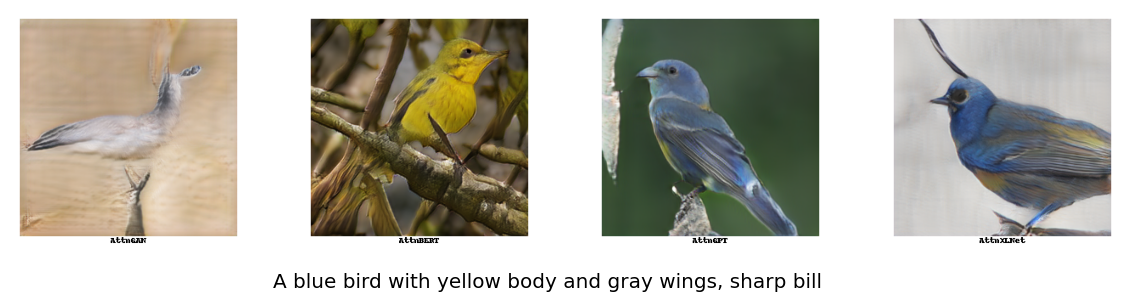

In [ ]:
if __name__ == '__main__':
  application()